In [1]:
# mount to google drive folder containing data -
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/MyDrive"

Mounted at /content/gdrive


In [2]:
import os
path = "/content/gdrive/MyDrive"
print(os.path.isdir(path))
print(os.path.isfile('/content/gdrive/MyDrive/Dữ liệu Đồ án tốt nghiệp (Autosaved).xlsx'))
# kiểm tra xem đường dẫn có tồn tại hay không

True
True


# I. DETERMINING THE PROBLEM

*   Identify factors affecting the movement of the Vnindex index using macroeconomic news and technical analysis using machine learning
*   Supervised Learning Algorithm
*  **INPUT:** Information of macroeconomic
*   **OUTPUT:** Identify influencing factors

# II. EXPLORATORY DATA ANALYSIS (EDA)

##**1. Import dataset and libraries**

In [3]:
import pandas as pd

# Load the data from the provided Excel file
data_path = '/content/gdrive/MyDrive/Dữ liệu Đồ án tốt nghiệp (Autosaved).xlsx'
data = pd.read_excel(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Date,Closing_price,Oil_price,Exchange_rate,Interest_rate,CPI,Money_supply_M2,S&P_500,XAU_USD
0,2016-03-15,574.04,51.74,21914.0,0.065,0.57,6267958,2015.93,1232.38
1,2016-03-16,577.07,51.75,22152.0,0.065,0.57,6267958,2027.22,1263.08
2,2016-03-17,579.26,51.28,21885.0,0.065,0.57,6267958,2040.59,1257.90
3,2016-03-18,575.82,51.34,22018.0,0.065,0.57,6267958,2049.58,1255.30
4,2016-03-21,572.27,51.36,21933.0,0.065,0.57,6267958,2051.60,1243.74


##**2. Check data**

In [23]:
data.isna().sum()

Date               0
Closing_price      0
Oil_price          0
Exchange_rate      0
Interest_rate      0
CPI                0
Money_supply_M2    0
S&P_500            0
XAU_USD            0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
# Kiểm tra các features (số lượng, kiểu dữ liệu)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2002 non-null   datetime64[ns]
 1   Closing_price    2002 non-null   float64       
 2   Oil_price        2002 non-null   float64       
 3   Exchange_rate    2002 non-null   float64       
 4   Interest_rate    2002 non-null   float64       
 5   CPI              2002 non-null   float64       
 6   Money_supply_M2  2002 non-null   int64         
 7   S&P_500          2002 non-null   float64       
 8   XAU_USD          2002 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 140.9 KB


In [26]:
# Hiển thị danh sách tên cột để kiểm tra và sửa lỗi
data.columns.tolist()

['Date',
 'Closing_price',
 'Oil_price',
 'Exchange_rate',
 'Interest_rate',
 'CPI',
 'Money_supply_M2',
 'S&P_500',
 'XAU_USD']

##**3. Descriptive statistics**

In [36]:
# Thực hiện thống kê mô tả cho các biến trong dữ liệu
description = data.describe()

description

,Closing_price,Oil_price,Exchange_rate,Interest_rate,CPI,Money_supply_M2,S&P_500,XAU_USD
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03,2002.000000,2002.000000
mean,1008.562133,65.705604,23095.115897,0.053988,0.264266,1.089839e+07,3323.271973,1564.271224
std,228.499609,21.026712,612.182465,0.010220,0.440917,2.782728e+06,838.329327,280.207245
min,555.820000,7.790000,21779.000000,0.040000,-1.540000,6.267958e+06,2000.540000,1128.430000
25%,856.285000,55.670000,22727.500000,0.044000,0.010000,8.521098e+06,2642.247500,1284.822500
50%,988.315000,66.820000,23171.000000,0.060000,0.250000,1.075802e+07,3099.015000,1552.695000
75%,1166.967500,77.655000,23321.574707,0.062500,0.510000,1.376102e+07,4129.542500,1824.365000
max,1528.570000,128.260000,24871.000000,0.065000,1.520000,1.535412e+07,5088.800000,2063.810000


##**4. Correlation**

<ipython-input-37-9eb2cffe3a06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


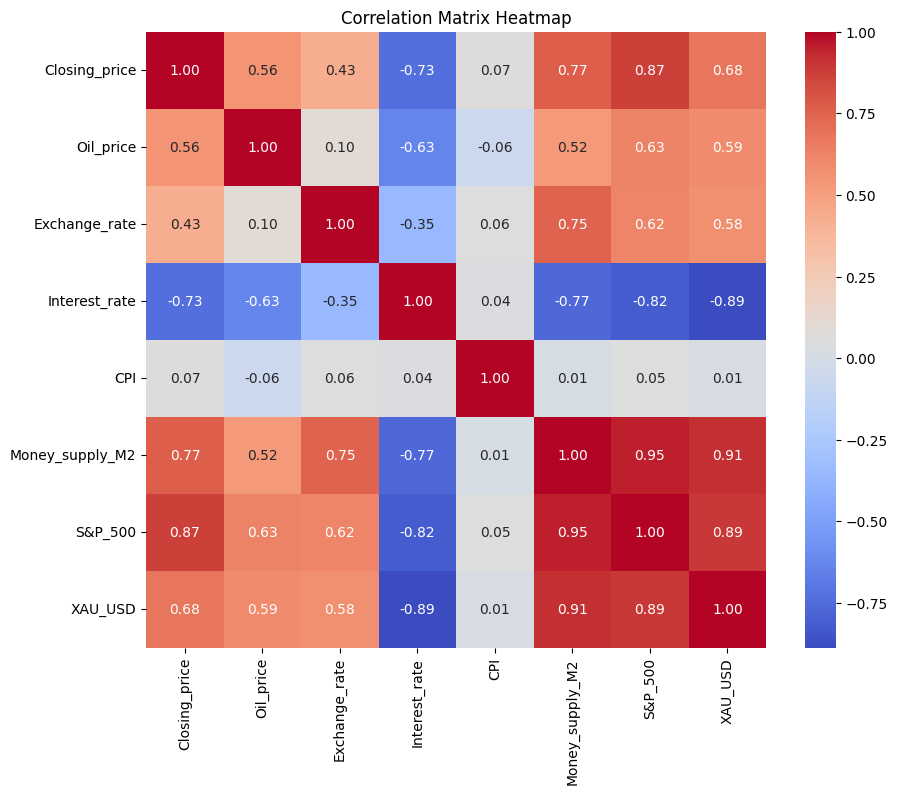

In [37]:
# Tính toán ma trận tương quan giữa các biến
correlation_matrix = data.corr()

correlation_matrix

import seaborn as sns

# Trực quan hóa ma trận tương quan sử dụng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Dựa vào biểu đồ heatmap cho ma trận tương quan, có thể nhận xét như sau:

Closing_price có mối tương quan mạnh và thuận với S&P_500 và Money_supply_M2, chỉ ra mối quan hệ chặt chẽ giữa giá cổ phiếu và cả hai chỉ số kinh tế vĩ mô này.

Có mối tương quan nghịch rất mạnh giữa Interest_rate và cả Closing_price, S&P_500, và XAU_USD, cho thấy lãi suất có xu hướng đi ngược lại với các chỉ số chứng khoán và giá vàng.

S&P_500 và Money_supply_M2 cũng tương quan mạnh với nhau, có thể phản ánh tác động của chính sách tiền tệ đối với thị trường chứng khoán.

XAU_USD (giá vàng) có mối tương quan thuận khá mạnh với Closing_price và S&P_500, có thể nói lên rằng vàng thường được coi là một kênh đầu tư an toàn khi thị trường chứng khoán tăng giá.

Mối tương quan giữa Oil_price và các chỉ số khác tương đối yếu hơn so với các mối tương quan đã nêu trên, điều này có thể cho thấy giá dầu không phải là yếu tố chính chi phối các biến kinh tế khác trong bộ dữ liệu này.

CPI có vẻ không tương quan rõ ràng với các biến khác, điều này có thể bất ngờ vì CPI thường là một chỉ báo của tình hình kinh tế tổng thể.

Những mối tương quan này có thể phản ánh cách thị trường chứng khoán và giá cả phản ứng với những thay đổi trong chính sách tiền tệ, kinh tế vĩ mô và các yếu tố quốc tế như giá dầu và vàng.

##**5. Data visualization**

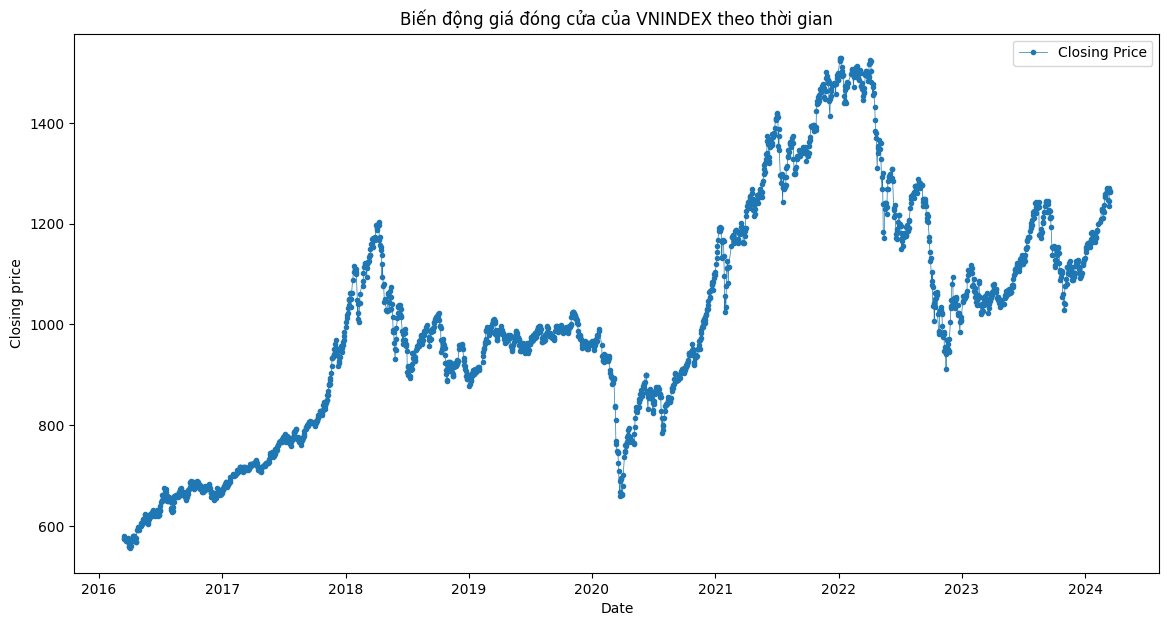

In [54]:
# Đảm bảo rằng cột 'Date' được định dạng đúng đắn như datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sắp xếp dữ liệu theo thứ tự ngày tháng
data_sorted = data.sort_values(by='Date')

# Trực quan hóa dữ liệu giữa 'Date' và 'Closing_price'
plt.figure(figsize=(14, 7))
plt.plot(data_sorted['Date'], data_sorted['Closing_price'], marker='.', linestyle='-', linewidth=0.5, label='Closing Price')
plt.title('Vnindex closing price fluctuations over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

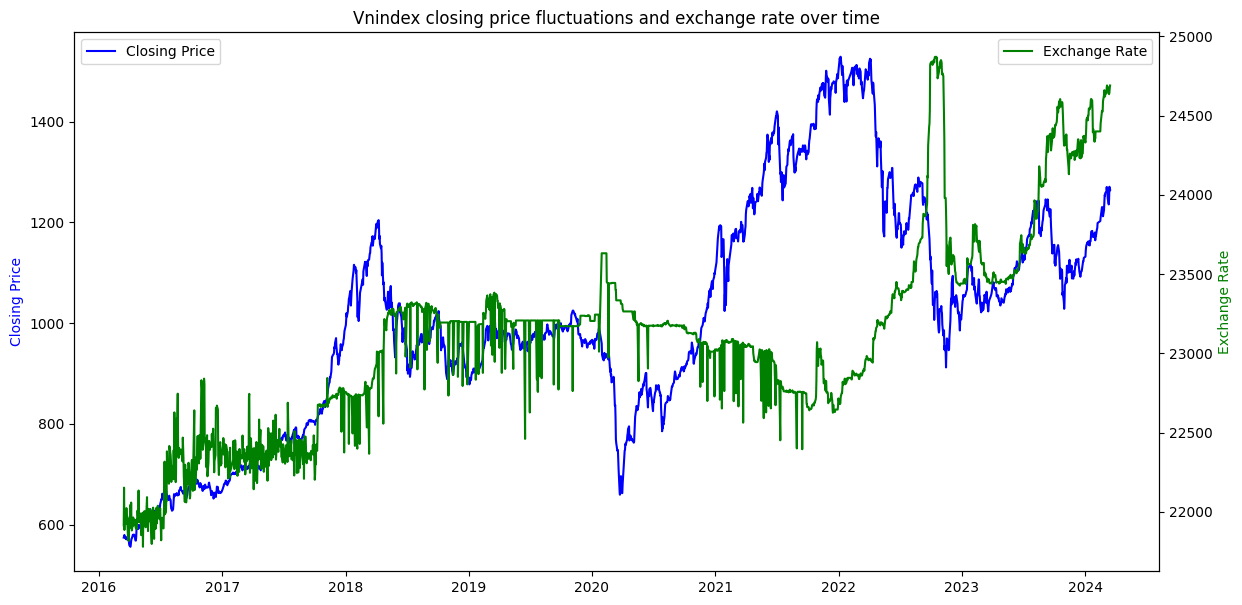

In [59]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Exchange_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho Exchange_rate
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['Exchange_rate'], label='Exchange Rate', color='green')
ax2.set_ylabel('Exchange Rate', color='green')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and exchange rate over time')
plt.xlabel('Date')
plt.show()

Closing Price: Có xu hướng tăng lên qua các năm, với một số biến động lớn có thể liên quan đến các sự kiện kinh tế hoặc chính trị cụ thể. Có một đợt sụt giảm đáng kể vào khoảng thời gian 2020, có thể là do ảnh hưởng của đại dịch COVID-19 đối với thị trường chứng khoán.

Exchange Rate: Biểu đồ cho thấy tỷ giá hối đoái biến động mạnh mẽ và có xu hướng tăng qua thời gian. Đặc biệt, tỷ giá có vẻ phục hồi sau mỗi đợt sụt giảm, điều này có thể phản ánh sự can thiệp của ngân hàng trung ương hoặc những thay đổi trong chính sách tiền tệ.

Nhận xét: Có vẻ như có một mối quan hệ nào đó giữa VNINDEX và tỷ giá hối đoái, nhưng không rõ ràng và cần phân tích thêm để hiểu rõ mối quan hệ này. Cả hai đều phản ánh sự biến động của thị trường và có thể bị ảnh hưởng bởi cùng một loạt yếu tố kinh tế, chính trị.

**Kết luận: Dữ liệu thị trường chứng khoán và tỷ giá hối đoái phản ánh sự không ổn định và sự biến động của môi trường kinh tế. Nhà đầu tư cần cân nhắc các yếu tố vĩ mô và quốc tế khi đánh giá các cơ hội đầu tư trên thị trường chứng khoán Việt Nam**

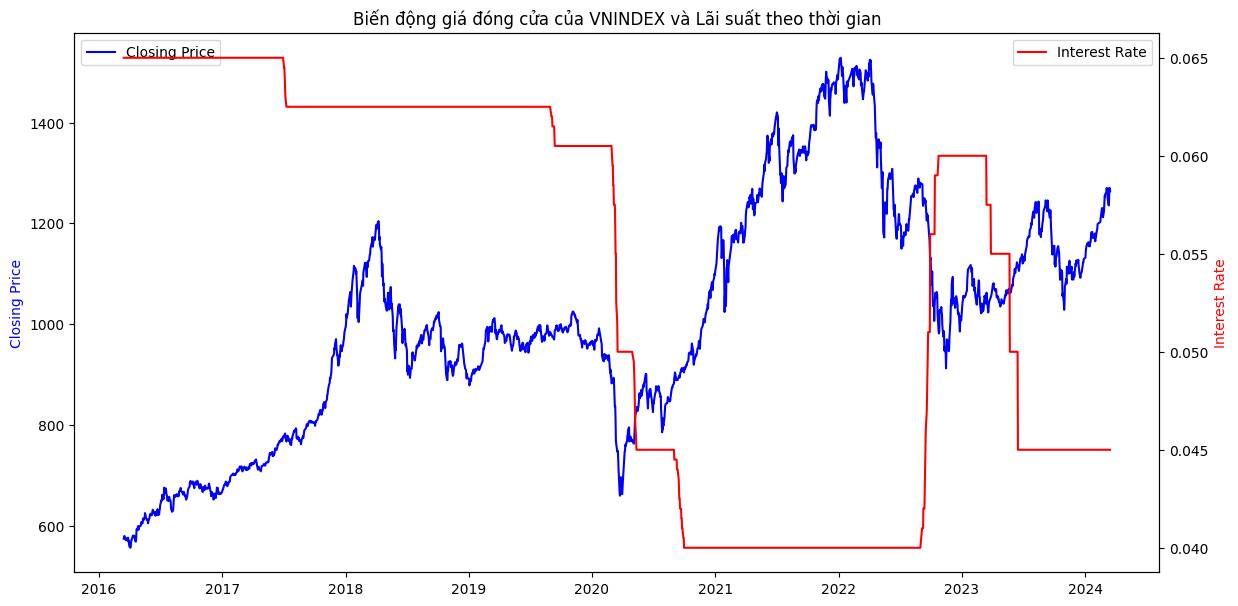

In [46]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['Interest_rate'], label='Interest Rate', color='red')
ax2.set_ylabel('Interest Rate', color='red')
ax2.legend(loc='upper right')

plt.title('Biến động giá đóng cửa của VNINDEX và Lãi suất theo thời gian')
plt.xlabel('Ngày')
plt.show()

Có vẻ như có một mối quan hệ đảo ngược giữa chỉ số VNINDEX và lãi suất: khi lãi suất giảm, VNINDEX có xu hướng tăng, và ngược lại. Điều này phù hợp với lý thuyết tài chính cơ bản rằng lãi suất thấp hơn có thể khuyến khích đầu tư vào thị trường chứng khoán do chi phí vay vốn giảm.

Đặc biệt, sau một đợt giảm lãi suất sâu vào khoảng năm 2020, có một sự tăng vọt của chỉ số VNINDEX, điều này cho thấy phản ứng tích cực của thị trường đối với sự nới lỏng chính sách tiền tệ.

Sự tăng giảm đột ngột của chỉ số VNINDEX có thể cũng phản ánh các yếu tố khác ngoài lãi suất, như dịch bệnh, biến động kinh tế vĩ mô, hoặc các sự kiện chính trị.

**Kết luận: Lãi suất có thể được coi là một yếu tố quan trọng ảnh hưởng đến thị trường chứng khoán Việt Nam. Sự thay đổi trong chính sách tiền tệ, cụ thể là lãi suất, cần được các nhà đầu tư chứng khoán quan sát chặt chẽ vì nó có thể có tác động đáng kể đến định giá cổ phiếu và hành vi đầu tư tổng thể.**

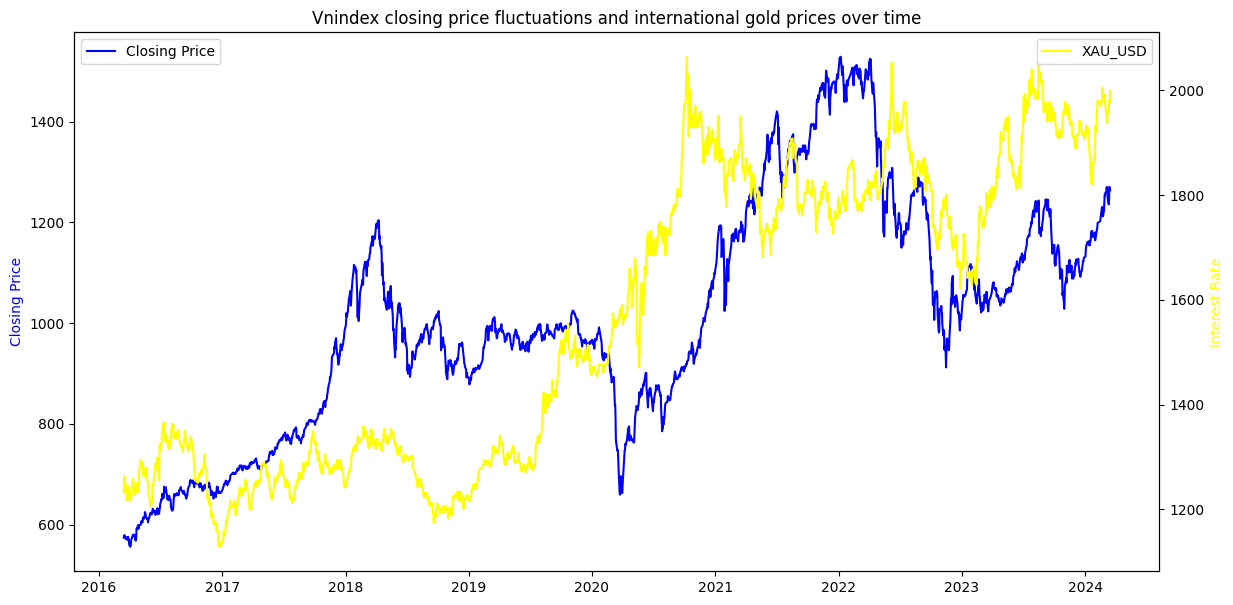

In [64]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['XAU_USD'], label='XAU_USD', color='yellow')
ax2.set_ylabel('Interest Rate', color='yellow')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and international gold prices over time')
plt.xlabel('Date')
plt.show()

Trên biểu đồ này, ta thấy sự biến động của chỉ số VNINDEX (Closing Price) so với giá vàng thế giới (XAU_USD) qua từng năm:

Chỉ số VNINDEX và giá vàng thế giới có vẻ như di chuyển không đồng nhất. Có thời kỳ chỉ số VNINDEX tăng trong khi giá vàng giảm và ngược lại, điều này cho thấy không có một mối quan hệ chặt chẽ và ổn định giữa hai thị trường này.
Tuy nhiên, trong một số giai đoạn, chẳng hạn như năm 2020 và đầu 2021, cả hai đều có xu hướng tăng giá, có thể do những lo ngại về lạm phát hoặc sự bất ổn kinh tế toàn cầu khiến các nhà đầu tư tìm đến vàng như một kênh đầu tư an toàn.

Đặc biệt sau cuối năm 2021 và đầu 2022, cả hai đều có sự biến động mạnh và tương quan với nhau nhiều hơn, cho thấy sự ảnh hưởng có thể của các sự kiện kinh tế vĩ mô và chính sách tiền tệ toàn cầu đến thị trường chứng khoán và giá vàng.

**Kết luận: Việc đầu tư vào chứng khoán và vàng có thể được xem xét là hai chiến lược đa dạng hóa với các rủi ro khác nhau và không phải lúc nào cũng có sự tương quan mật thiết với nhau. Nhà đầu tư cần cân nhắc đa dạng hóa danh mục đầu tư của mình để giảm thiểu rủi ro và không nên dựa hoàn toàn vào một chỉ số hoặc một loại tài sản cụ thể.**

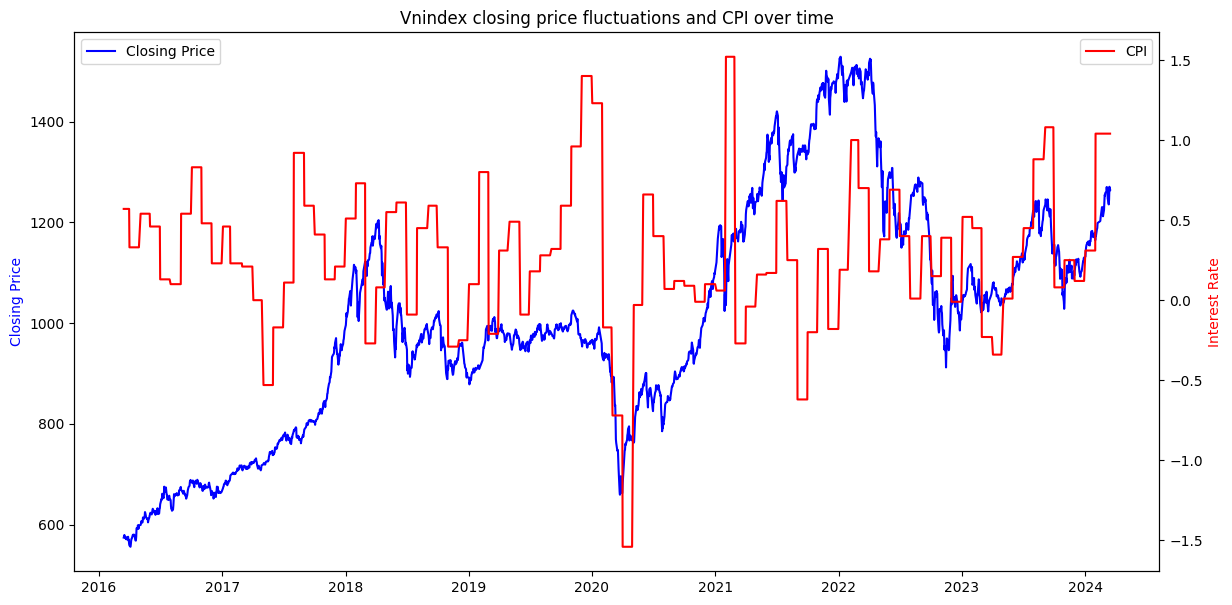

In [63]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['CPI'], label='CPI', color='red')
ax2.set_ylabel('Interest Rate', color='red')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and CPI over time')
plt.xlabel('Date')
plt.show()

Chỉ số VNINDEX tăng trưởng mạnh mẽ qua các năm, với những biến động lên xuống, nhưng tổng thể là xu hướng tăng. Điều này cho thấy thị trường chứng khoán có sự phục hồi và tăng trưởng liên tục qua các năm.

Chỉ số CPI cũng biến động nhưng không theo một xu hướng rõ ràng như VNINDEX. CPI có thời kỳ tăng lên nhưng cũng có giai đoạn giảm. Biến động của CPI phản ánh mức độ lạm phát và thay đổi về chi phí sống trong nền kinh tế.

Trong một số khoảng thời gian, VNINDEX và CPI có vẻ như biến động đồng pha, tức là khi CPI tăng thì VNINDEX cũng tăng, điều này có thể cho thấy sự tăng giá cổ phiếu phần nào liên quan đến lạm phát. Tuy nhiên, không phải lúc nào hai chỉ số này cũng có sự biến động tương ứng, cho thấy rằng lạm phát không phải là yếu tố duy nhất ảnh hưởng đến thị trường chứng khoán.

**Kết luận: VNINDEX có xu hướng tăng qua các năm và không phản ánh trực tiếp các biến động của CPI**. Điều này có thể cho thấy rằng nhà đầu tư chứng khoán cần xem xét nhiều yếu tố khác ngoài lạm phát khi đánh giá triển vọng của thị trường chứng khoán, và CPI chỉ là một trong số đó. Việc đầu tư vào thị trường chứng khoán có thể mang lại lợi nhuận trong dài hạn mặc dù có những biến động ngắn hạn liên quan đến lạm phát và các yếu tố kinh tế vĩ mô khác.

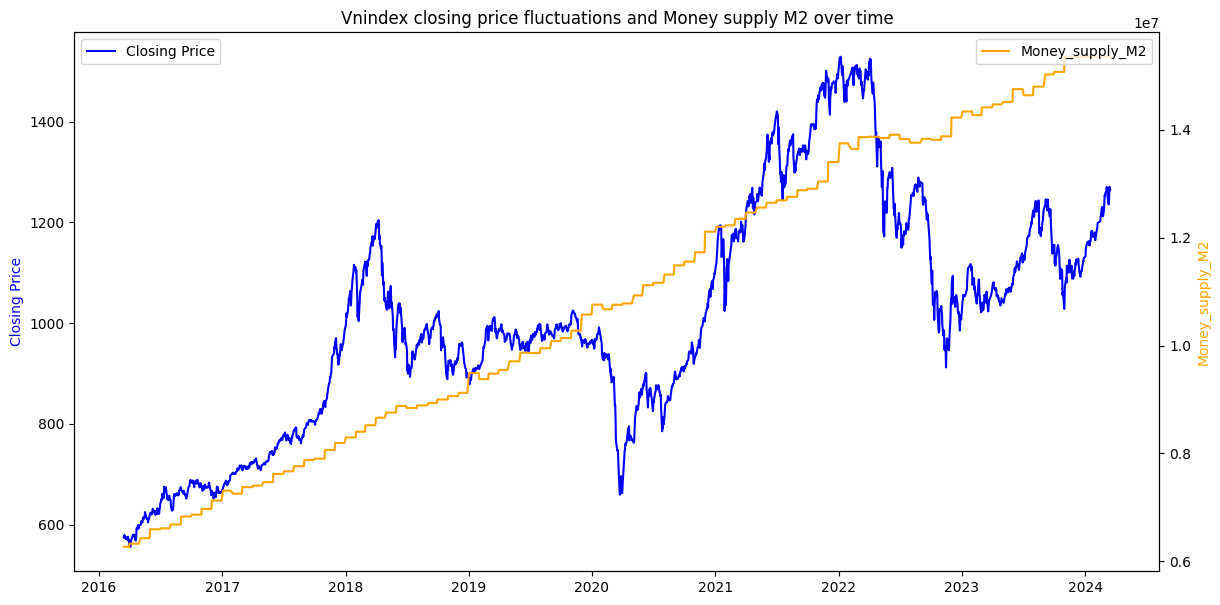

In [61]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['Money_supply_M2'], label='Money_supply_M2', color='orange')
ax2.set_ylabel('Money_supply_M2', color='orange')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and Money supply M2 over time')
plt.xlabel('Date')
plt.show()

Chỉ số VNINDEX và lượng tiền cung M2 có xu hướng tăng dần qua các năm, với một số biến động nhỏ.

Đáng chú ý là sự tương quan giữa hai chỉ số, khi lượng tiền cung M2 tăng lên thì chỉ số VNINDEX cũng thấy tăng theo, có thể phản ánh mối quan hệ giữa lượng tiền lưu thông trong nền kinh tế với giá trị thị trường chứng khoán.

Có những giai đoạn lượng tiền cung M2 tăng không đi kèm với sự tăng của VNINDEX và ngược lại, điều này cho thấy có các yếu tố khác cũng ảnh hưởng đến thị trường chứng khoán ngoài lượng tiền cung.

**Kết luận: Mặc dù có mối quan hệ tương quan giữa lượng tiền cung M2 và chỉ số VNINDEX, không thể dựa hoàn toàn vào mối quan hệ này để dự đoán xu hướng thị trường**

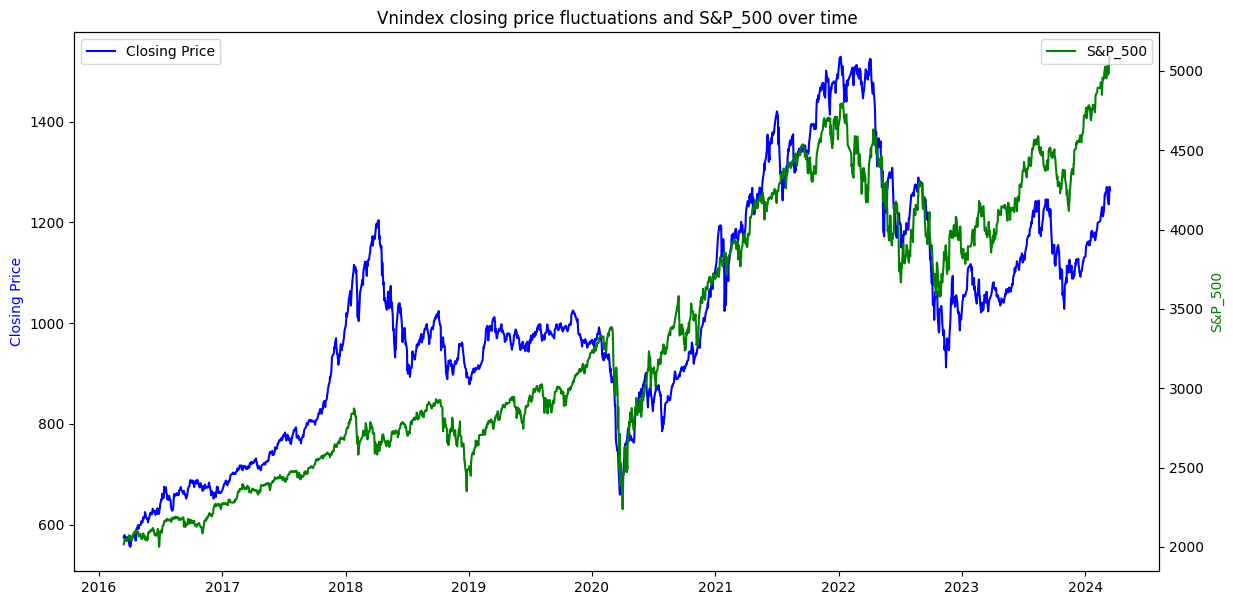

In [68]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['S&P_500'], label='S&P_500', color='green')
ax2.set_ylabel('S&P_500', color='green')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and S&P_500 over time')
plt.xlabel('Date')
plt.show()

Cả hai chỉ số thị trường chứng khoán đều cho thấy sự biến động đáng kể qua các năm, với các đỉnh và đáy rõ ràng.
VNINDEX và S&P 500 có vẻ như chịu ảnh hưởng của các sự kiện kinh tế tương tự nhau, dựa trên sự di chuyển song hành của hai dòng trong khoảng thời gian này.

Một điểm đáng chú ý là sự sụt giảm sâu và đồng thời của cả hai chỉ số, có lẽ phản ánh một sự kiện kinh tế toàn cầu hoặc tác động tiêu cực từ một sự kiện tài chính cụ thể.
Sau sự sụt giảm, cả hai chỉ số đều hồi phục và tiếp tục xu hướng tăng lên, cho thấy khả năng phục hồi của thị trường chứng khoán trước các khủng hoảng.

**Kết luận: Mặc dù VNINDEX và S&P 500 hoạt động trong các thị trường khác nhau, chúng đều phản ánh tình hình kinh tế vĩ mô toàn cầu, và những biến động lớn có thể gây ra tác động đồng loạt trên nhiều thị trường. Điều này nhấn mạnh tầm quan trọng của việc theo dõi các chỉ số kinh tế toàn cầu để đánh giá xu hướng và cơ hội đầu tư trong thị trường chứng khoán. Cả hai thị trường đều cho thấy tiềm năng tăng trưởng trong dài hạn, nhưng cũng cần lưu ý đến rủi ro liên quan đến biến động và tác động từ các sự kiện kinh tế toàn cầu.**

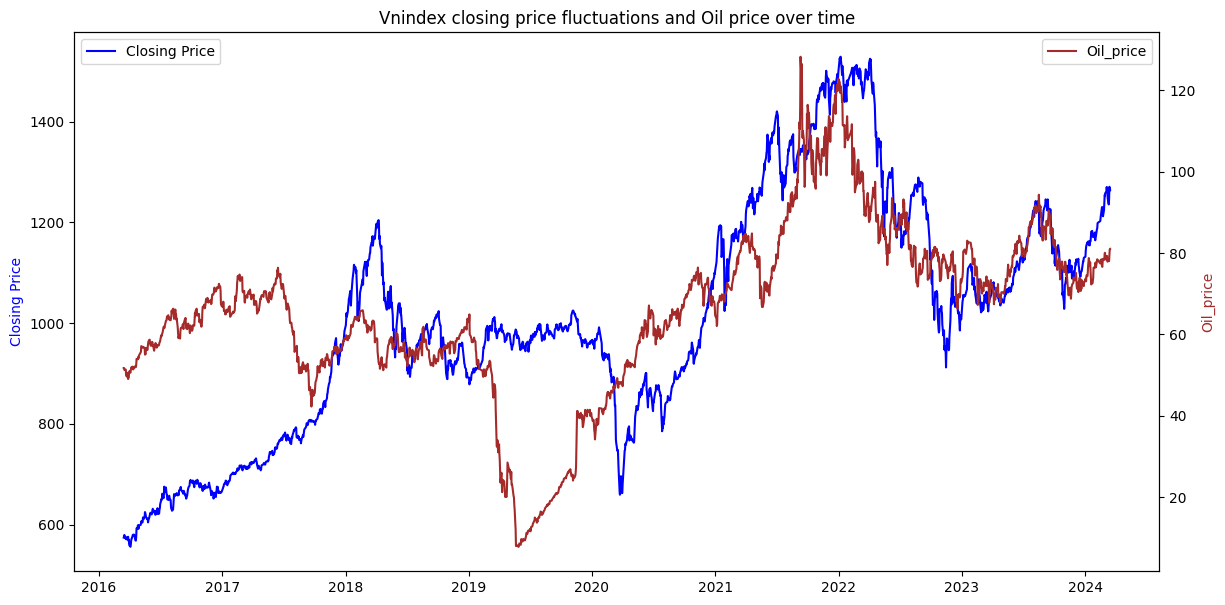

In [67]:
# Trực quan hóa dữ liệu giữa 'Date', 'Closing_price' và 'Interest_rate'
plt.figure(figsize=(14, 7))

plt.plot(data_sorted['Date'], data_sorted['Closing_price'], label='Closing Price', color='blue')
plt.ylabel('Closing Price', color='blue')
plt.legend(loc='upper left')

# Tạo trục y phụ cho 'Interest_rate'
ax2 = plt.gca().twinx()
ax2.plot(data_sorted['Date'], data_sorted['Oil_price'], label='Oil_price', color='brown')
ax2.set_ylabel('Oil_price', color='brown')
ax2.legend(loc='upper right')

plt.title('Vnindex closing price fluctuations and Oil price over time')
plt.xlabel('Date')
plt.show()

Giá dầu và VNINDEX có vẻ như có những đợt biến động tương quan, đặc biệt là trong những thời kỳ giá dầu có sự thay đổi mạnh mẽ. Điều này có thể cho thấy rằng thị trường chứng khoán Việt Nam phản ứng với những thay đổi trong giá cả năng lượng toàn cầu.

Cả hai đường biểu đồ đều cho thấy sự sụt giảm rõ rệt vào khoảng thời gian 2020, điều này có thể do ảnh hưởng của đại dịch COVID-19 đến kinh tế toàn cầu và thị trường dầu mỏ.
Sau sự sụt giảm đó, cả hai chỉ số đều phục hồi, nhưng có vẻ như giá dầu có những biến động lớn hơn so với VNINDEX.

**Kết luận: Giá dầu có ảnh hưởng đến VNINDEX, nhưng mức độ ảnh hưởng và mối quan hệ giữa chúng không hoàn toàn đồng nhất qua các thời kỳ.**

# **III. DATA PREPROCESSING**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Preparing the data
X = data.drop(['Date', 'Closing_price'], axis=1)
y = data['Closing_price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IV. MODELS

## **1. RANDOM FOREST**

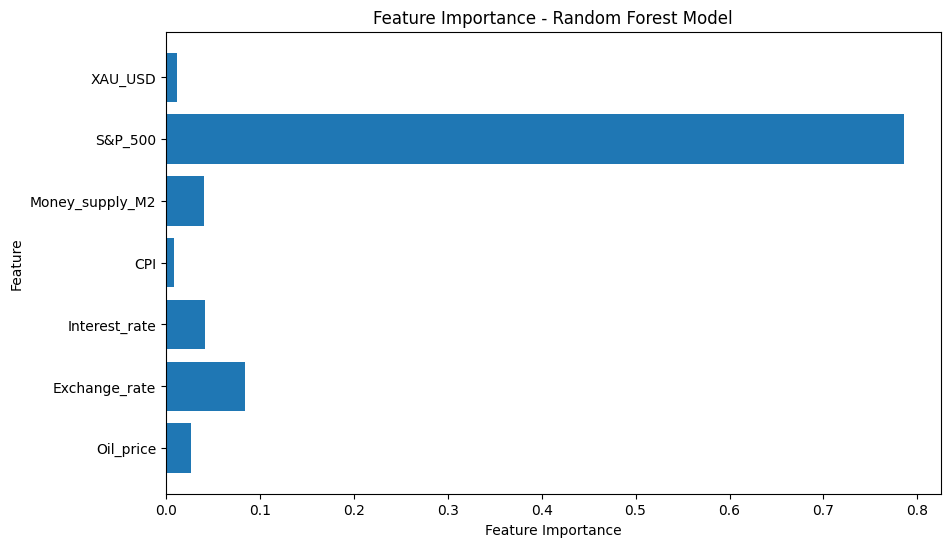

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Re-training the Random Forest model with the entire dataset for feature importance analysis
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Calculating feature importance
feature_importances = rf_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Model')
plt.show()


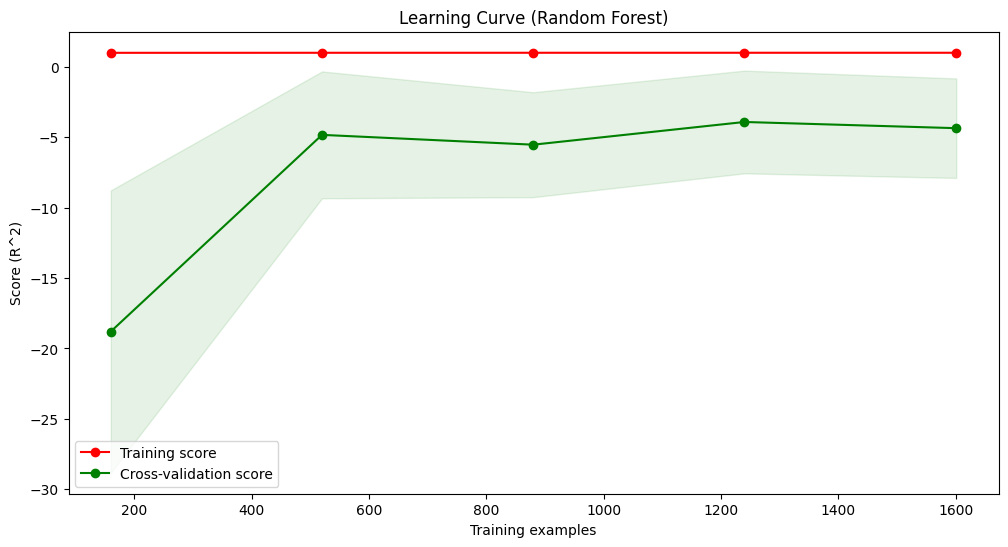

In [10]:
# Computing learning curves with the scoring method adjusted to r2 for better interpretation
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=RandomForestRegressor(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()


Điểm số huấn luyện ổn định ở mức cao (gần 0, cho thấy hiệu suất rất tốt) và không thay đổi nhiều khi số lượng mẫu huấn luyện tăng lên, điều này cho thấy mô hình có hiệu suất tốt trên dữ liệu huấn luyện và không có dấu hiệu của underfitting.

Điểm số kiểm định chéo tăng lên đáng kể khi số lượng mẫu huấn luyện tăng, bắt đầu từ mức rất thấp (rất tiêu cực) và tiến tới 0, cho thấy rằng mô hình bắt đầu cải thiện khả năng tổng quát hóa khi nó được huấn luyện với nhiều mẫu hơn.

Sự chênh lệch giữa điểm số huấn luyện và điểm số kiểm định chéo giảm đi theo số lượng mẫu huấn luyện, điều này cho thấy mô hình có khả năng tổng quát hóa tốt hơn và không có dấu hiệu overfitting rõ rệt.

**Kết luận: Mô hình Random Forest cho thấy có khả năng tổng quát hóa tốt khi được huấn luyện với số lượng mẫu dữ liệu lớn hơn**
















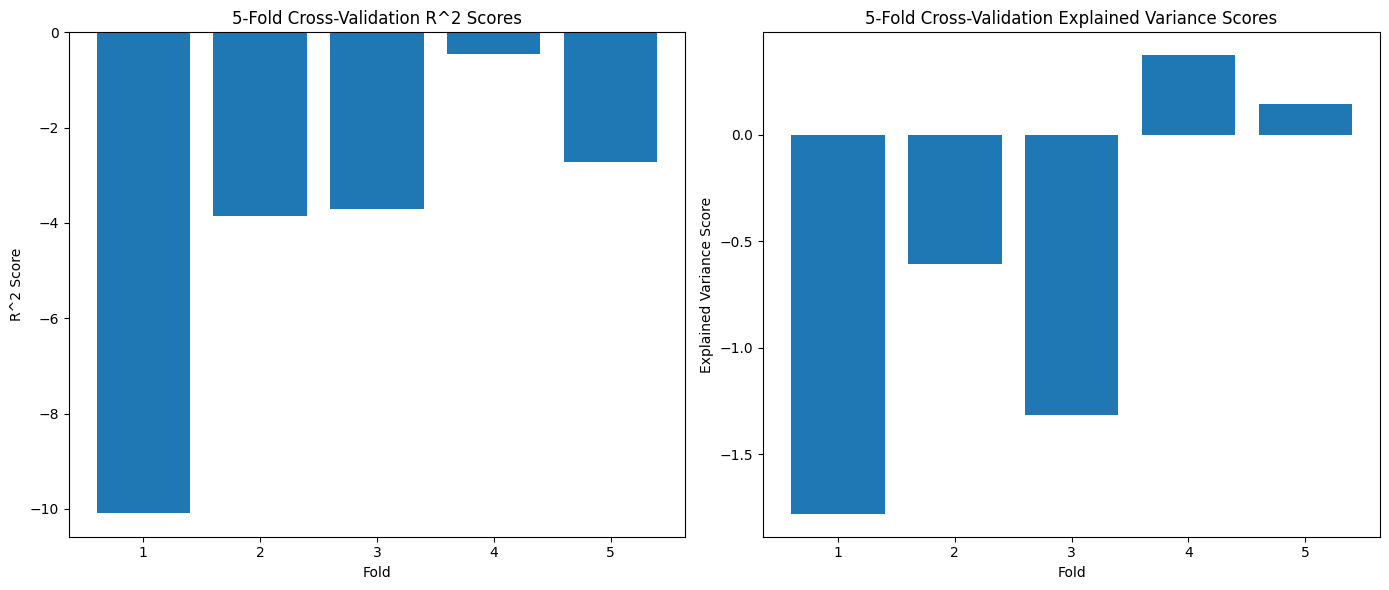

In [11]:
# Recomputing cross-validation and explained variance scores for visualization
cv_scores_r2 = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='r2')
explained_variance_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='explained_variance')

# Plotting the cross-validation R^2 scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores')

# Plotting the explained variance scores
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores')

plt.tight_layout()
plt.show()


Điểm số R^2 dao động từ tiêu cực đến gần không trên tất cả các fold.

Tương tự như R^2, điểm số Explained Variance cũng thể hiện rằng mô hình không giải thích tốt sự biến động của dữ liệu.

**Kết luận: Mô hình hiện tại cần được điều chỉnh tối ưu hơn**

## **2. XGBOOST**

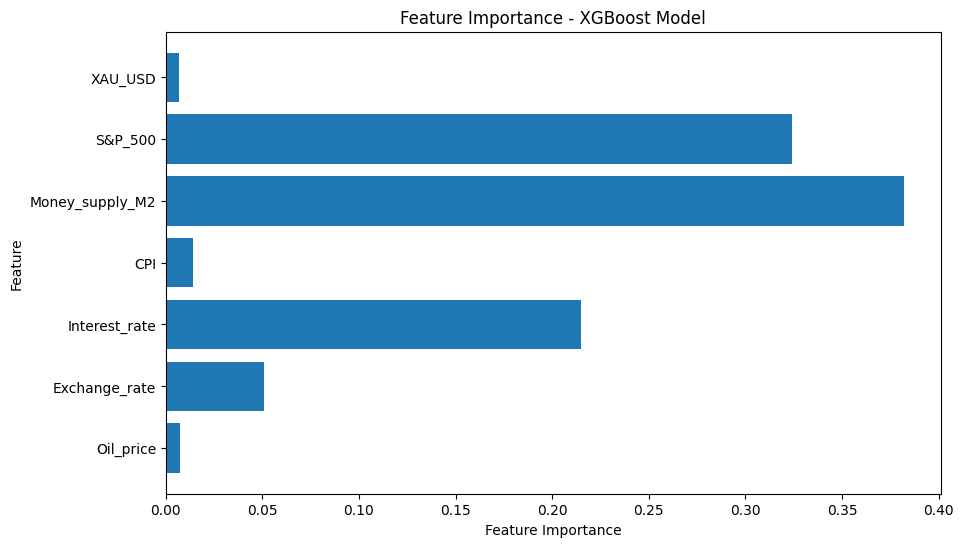

In [12]:
# Training the XGBoost model to calculate and visualize feature importance
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

# Calculating feature importance from the XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=xgb_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost Model')
plt.show()


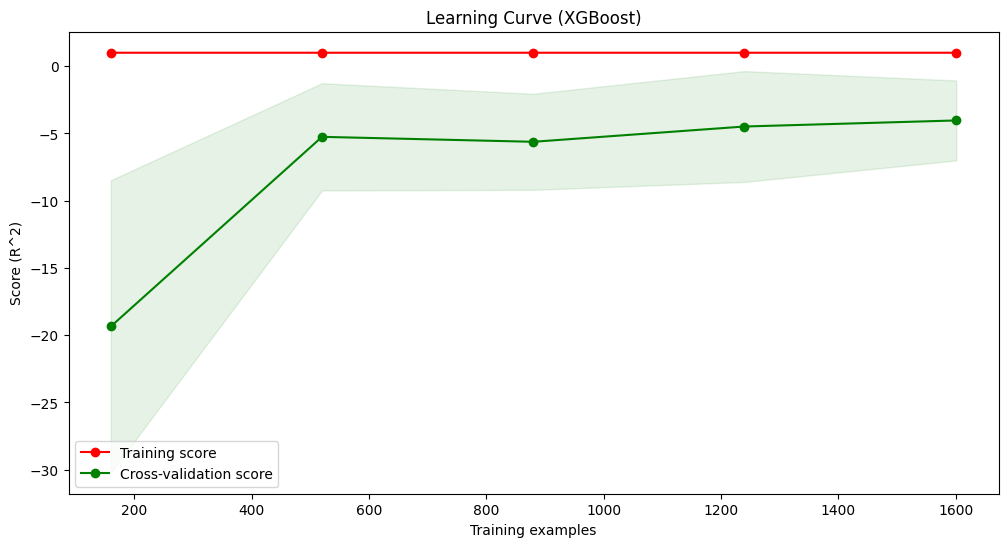

In [13]:
# Computing learning curves for the XGBoost model with the scoring method adjusted to r2
train_sizes_xgb, train_scores_xgb, validation_scores_xgb = learning_curve(
    estimator=XGBRegressor(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for XGBoost
train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_scores_std_xgb = np.std(train_scores_xgb, axis=1)
validation_scores_mean_xgb = np.mean(validation_scores_xgb, axis=1)
validation_scores_std_xgb = np.std(validation_scores_xgb, axis=1)

# Plotting the learning curves for XGBoost
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_xgb, train_scores_mean_xgb - train_scores_std_xgb,
                 train_scores_mean_xgb + train_scores_std_xgb, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_xgb, validation_scores_mean_xgb - validation_scores_std_xgb,
                 validation_scores_mean_xgb + validation_scores_std_xgb, alpha=0.1, color="g")
plt.plot(train_sizes_xgb, train_scores_mean_xgb, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_xgb, validation_scores_mean_xgb, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()

Training Score (Điểm huấn luyện): Điểm huấn luyện cao và ổn định trên toàn bộ quá trình, cho thấy mô hình hoạt động tốt trên dữ liệu huấn luyện và có khả năng học từ dữ liệu.

Cross-validation Score (Điểm cross-validation): Tăng đáng kể khi số lượng mẫu huấn luyện tăng lên và sau đó ổn định. Điều này cho thấy mô hình cải thiện khả năng tổng quát hóa khi được huấn luyện với nhiều dữ liệu hơn.

Khoảng cách giữa điểm huấn luyện và cross-validation: Khoảng cách này giảm dần và bắt đầu ổn định khi số lượng mẫu tăng lên, điều này cho thấy mô hình không bị overfitting nhiều và có khả năng tổng quát hóa tốt khi được cung cấp nhiều dữ liệu hơn.

**Kết luận: Mô hình XGBoost cho thấy tiềm năng tổng quát hóa tốt và khả năng làm việc hiệu quả với dữ liệu huấn luyện**

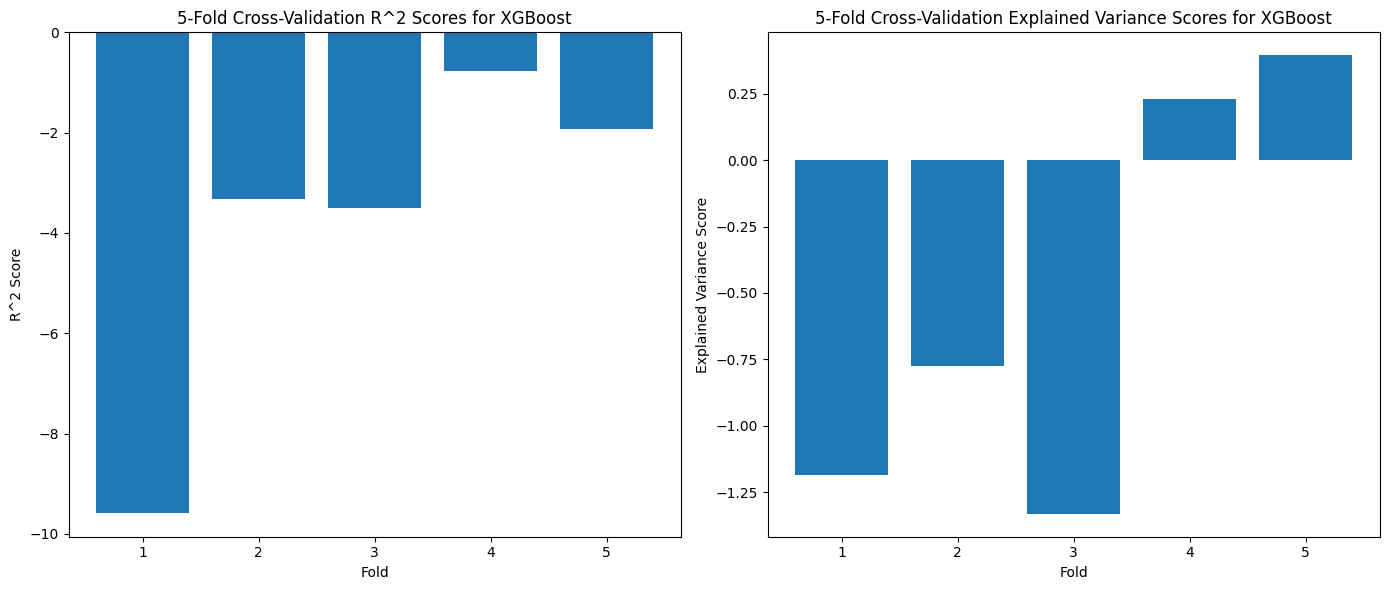

In [14]:
# Since the training of the XGBoost model was interrupted, let's proceed with calculating and visualizing
# the Cross-Validation and Explained Variance Score for the XGBoost model without retraining it.

# Calculating cross-validation R^2 scores for the XGBoost model
cv_scores_r2_xgb = cross_val_score(XGBRegressor(), X, y, cv=5, scoring='r2')

# Calculating explained variance scores for the XGBoost model
explained_variance_scores_xgb = cross_val_score(XGBRegressor(), X, y, cv=5, scoring='explained_variance')

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for XGBoost
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_xgb)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for XGBoost')

# Plotting the explained variance scores for XGBoost
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_xgb)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for XGBoost')

plt.tight_layout()
plt.show()

R^2 Scores: Các điểm số R^2 dao động từ âm đến gần không qua các fold. Điểm số R^2 thấp (đặc biệt là khi âm) cho thấy mô hình không giải thích được biến thiên của dữ liệu một cách hiệu quả. Có vẻ như mô hình không khớp tốt với dữ liệu.

Explained Variance Scores: Các giá trị này cũng thấp, thậm chí đạt giá trị âm trong một số fold, điều này ngụ ý rằng mô hình không dự đoán chính xác biến thiên của dữ liệu. Tuy nhiên, có sự cải thiện ở fold thứ 5, nơi mà giá trị tiệm cận với không.

**Kết luận: Mô hình XGBoost hiện tại có thể không phù hợp hoặc cần được tinh chỉnh kỹ lưỡng hơn để khớp với dữ liệu**

## **3. LINER REGRESSION**

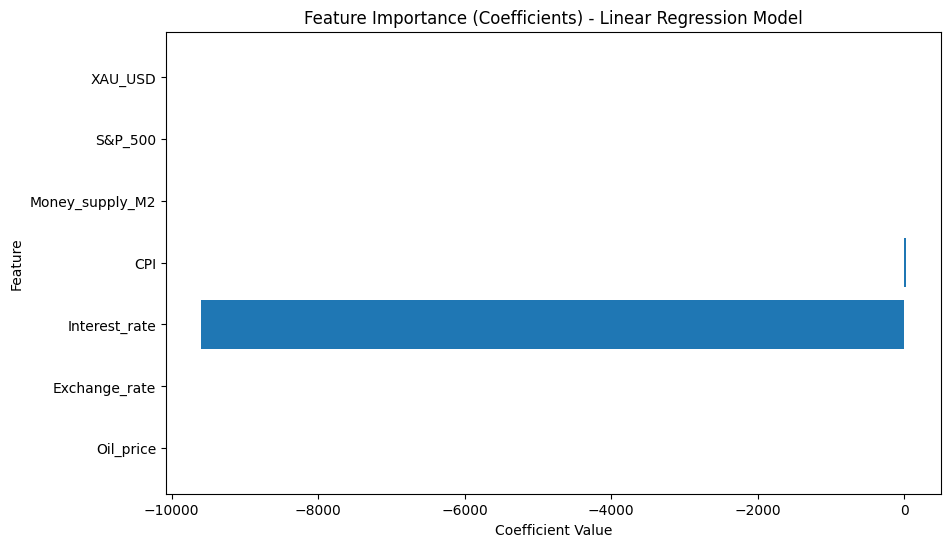

In [15]:
# Training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Extracting coefficients
lr_coefficients = lr_model.coef_

# Plotting the coefficients as feature importance
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=lr_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients) - Linear Regression Model')
plt.show()


Interest_rate có ảnh hưởng lớn và tiêu cực đến mô hình, với hệ số rất cao theo giá trị tuyệt đối, cho thấy khi lãi suất tăng thì giá trị mục tiêu (có thể là giá đóng cửa chứng khoán) sẽ giảm.

Exchange_rate cũng có ảnh hưởng tiêu cực lớn, theo sau Interest_rate, có thể chỉ ra rằng khi tỷ giá tăng, giá trị mục tiêu sẽ giảm.

Oil_price có ảnh hưởng tiêu cực nhỏ hơn so với hai đặc trưng trên.

Các đặc trưng khác như CPI, Money_supply_M2, S&P_500, và XAU_USD có hệ số gần bằng 0 hoặc rất nhỏ, cho thấy ảnh hưởng của chúng đến giá trị mục tiêu không đáng kể trong mô hình này.

**Kết luận: Trong mô hình hồi quy tuyến tính này, lãi suất và tỷ giá hối đoái là những yếu tố quan trọng và có tác động tiêu cực đáng kể đến giá trị mục tiêu**

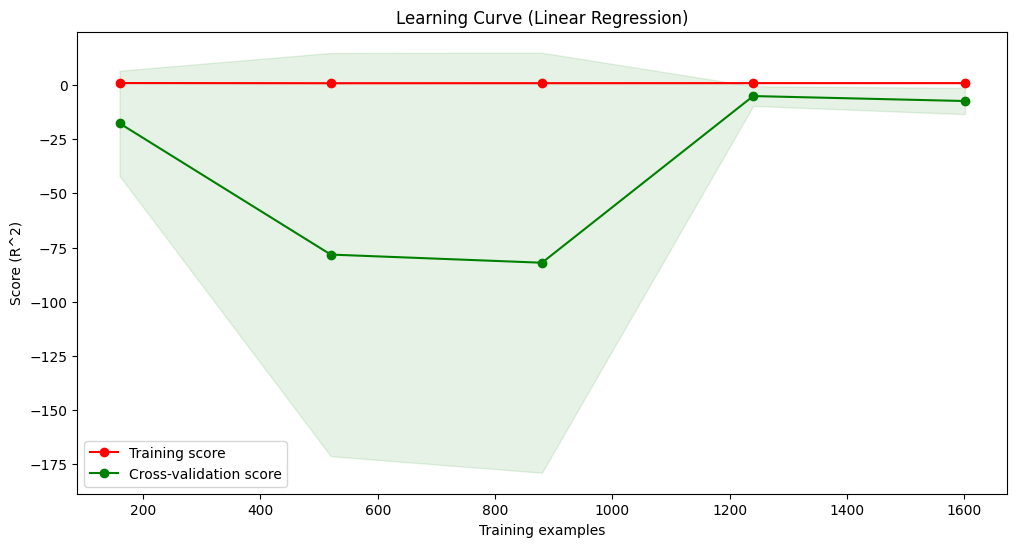

In [16]:
# Computing learning curves for the Linear Regression model with the scoring method adjusted to r2
train_sizes_lr, train_scores_lr, validation_scores_lr = learning_curve(
    estimator=LinearRegression(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for Linear Regression
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
validation_scores_mean_lr = np.mean(validation_scores_lr, axis=1)
validation_scores_std_lr = np.std(validation_scores_lr, axis=1)

# Plotting the learning curves for Linear Regression
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_lr, train_scores_mean_lr - train_scores_std_lr,
                 train_scores_mean_lr + train_scores_std_lr, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_lr, validation_scores_mean_lr - validation_scores_std_lr,
                 validation_scores_mean_lr + validation_scores_std_lr, alpha=0.1, color="g")
plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_lr, validation_scores_mean_lr, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (Linear Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()


Training Score (Điểm huấn luyện): Điểm số trên tập huấn luyện giữ ở mức ổn định và không thay đổi nhiều qua các kích thước tập huấn luyện khác nhau, cho thấy mô hình có khả năng học tốt từ dữ liệu huấn luyện.

Cross-validation Score (Điểm cross-validation): Điểm số cross-validation có sự biến động lớn, giảm mạnh khi số lượng mẫu huấn luyện tăng từ 200 lên 600, sau đó tăng trở lại và ổn định ở số lượng mẫu lớn. Sự biến động mạnh trong điểm số cross-validation có thể là dấu hiệu của việc mô hình không ổn định hoặc có vấn đề với phần dữ liệu nhất định.

**Kết luận: Mô hình hồi quy tuyến tính cho thấy dấu hiệu không ổn định và có thể không phù hợp với bộ dữ liệu hiện tại.**

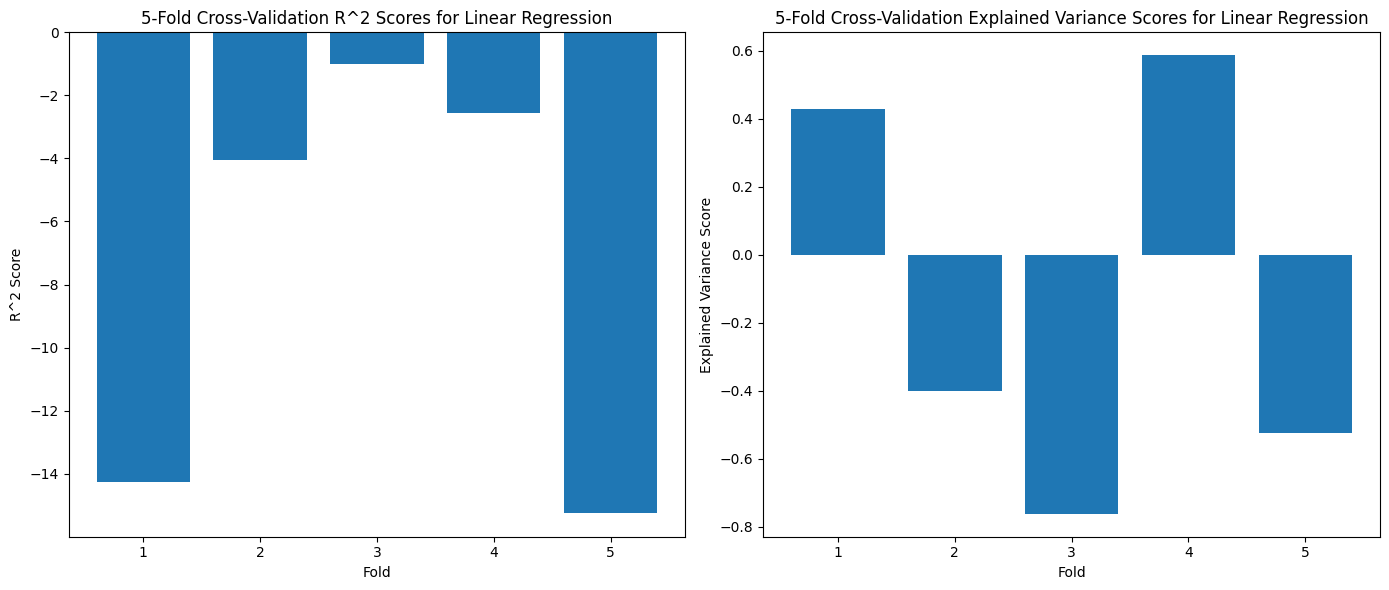

In [17]:
# Calculating cross-validation R^2 scores for the Linear Regression model
cv_scores_r2_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

# Calculating explained variance scores for the Linear Regression model
explained_variance_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='explained_variance')

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for Linear Regression
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_lr)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for Linear Regression')

# Plotting the explained variance scores for Linear Regression
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_lr)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for Linear Regression')

plt.tight_layout()
plt.show()


Các điểm số R^2 rất thấp và đều âm trong mỗi fold, cho thấy mô hình không thể giải thích một cách hiệu quả biến thiên của dữ liệu. Điều này có thể chỉ ra rằng mô hình hiện tại không phù hợp hoặc các đặc trưng được sử dụng không đủ mạnh để dự đoán biến phụ thuộc.

Điểm số Explained Variance dao động và cũng có giá trị âm trong một số fold. Một số giá trị dương cho thấy mô hình có thể giải thích một phần biến thiên của dữ liệu, nhưng sự không nhất quán giữa các fold lại là một dấu hiệu của việc mô hình không ổn định.

**Kết luận: Mô hình hồi quy tuyến tính không phải là sự lựa chọn tốt cho bộ dữ liệu này dựa trên kết quả cross-validation.**

## **4. DECISION TREE REGRESSOR**

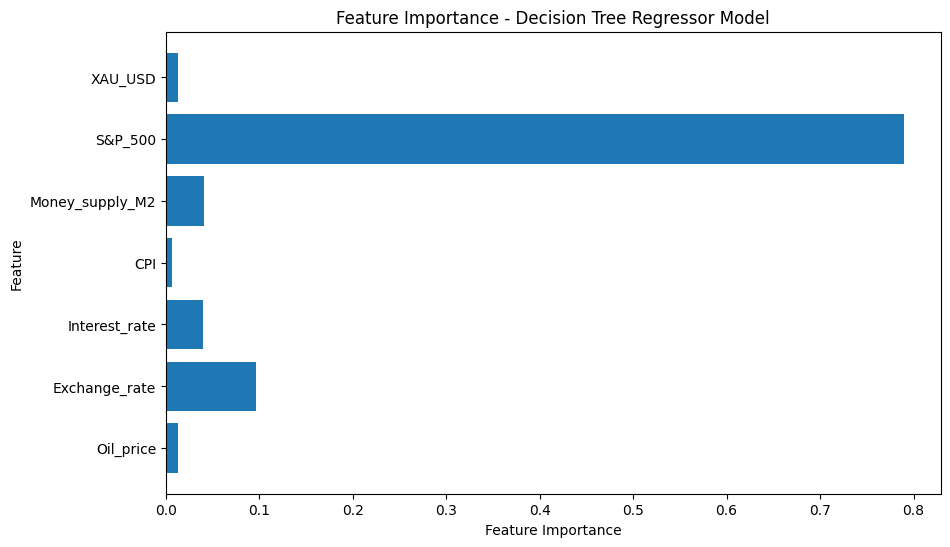

In [18]:
# Training the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Calculating feature importance from the Decision Tree model
dt_feature_importances = dt_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=dt_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree Regressor Model')
plt.show()


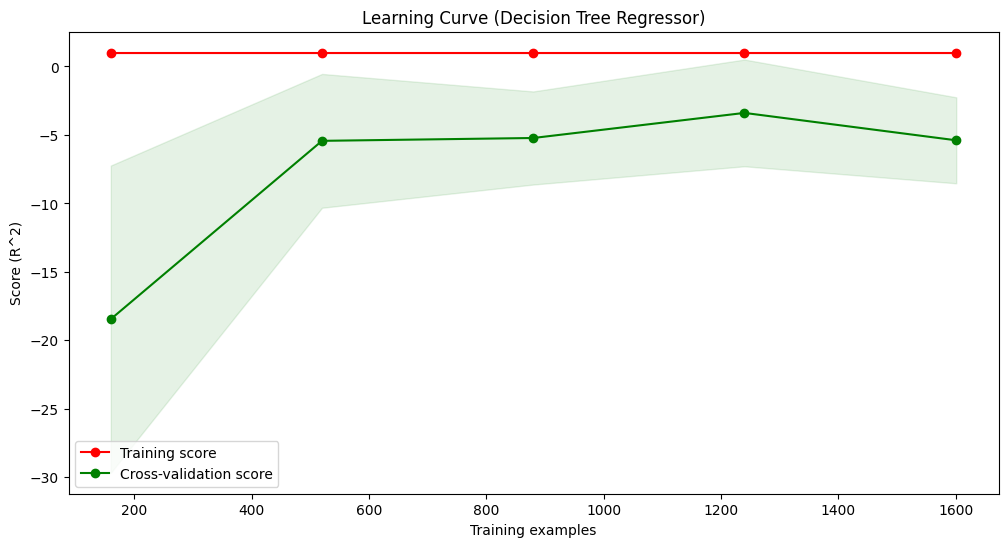

In [19]:
# Computing learning curves for the Decision Tree Regressor model with the scoring method adjusted to r2
train_sizes_dt, train_scores_dt, validation_scores_dt = learning_curve(
    estimator=DecisionTreeRegressor(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for Decision Tree Regressor
train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
train_scores_std_dt = np.std(train_scores_dt, axis=1)
validation_scores_mean_dt = np.mean(validation_scores_dt, axis=1)
validation_scores_std_dt = np.std(validation_scores_dt, axis=1)

# Plotting the learning curves for Decision Tree Regressor
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_dt, train_scores_mean_dt - train_scores_std_dt,
                 train_scores_mean_dt + train_scores_std_dt, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_dt, validation_scores_mean_dt - validation_scores_std_dt,
                 validation_scores_mean_dt + validation_scores_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_dt, validation_scores_mean_dt, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (Decision Tree Regressor)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()


Điểm số huấn luyện (Training Score): Điểm số này cao và ổn định trên toàn bộ dải số lượng mẫu huấn luyện, cho thấy mô hình có khả năng học tốt từ dữ liệu huấn luyện mà không gặp vấn đề overfitting.

Điểm số kiểm định chéo (Cross-validation Score): Tăng đáng kể khi số lượng mẫu huấn luyện tăng, điều này cho thấy mô hình cải thiện khả năng tổng quát hóa khi có thêm thông tin. Tuy nhiên, vẫn có khoảng cách giữa điểm số huấn luyện và kiểm định chéo, dù khoảng cách này không quá lớn.

**Kết luận: Mô hình Decision Tree Regressor cho thấy khả năng tổng quát hóa khá tốt và có khả năng làm việc hiệu quả với dữ liệu huấn luyện.**

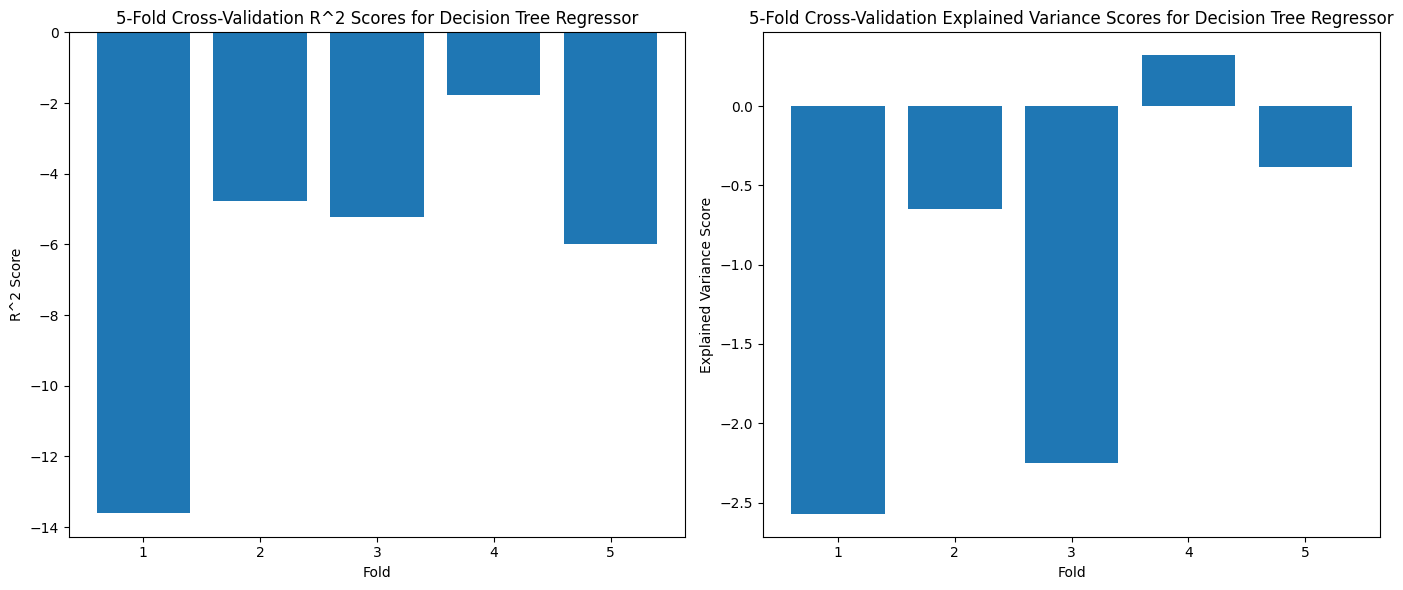

In [20]:
# Calculating cross-validation R^2 scores for the Decision Tree Regressor model
cv_scores_r2_dt = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='r2')

# Calculating explained variance scores for the Decision Tree Regressor model
explained_variance_scores_dt = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='explained_variance')

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for Decision Tree Regressor
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_dt)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for Decision Tree Regressor')

# Plotting the explained variance scores for Decision Tree Regressor
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_dt)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for Decision Tree Regressor')

plt.tight_layout()
plt.show()


Điểm số R^2: Các giá trị cho thấy mô hình có hiệu suất không đồng đều qua các fold, với điểm số dao động và phần lớn ở dưới 0. Điều này chỉ ra rằng mô hình không thể giải thích tốt biến thiên của dữ liệu.

Explained Variance: Cũng giống như R^2, Explained Variance cho thấy sự không nhất quán trong việc dự đoán biến thiên của dữ liệu, với một số fold có giá trị âm.

**Kết luận: Mô hình Decision Tree Regressor hiện tại có vẻ  cần được tinh chỉnh thêm. Việc điểm số R^2 và Explained Variance không ổn định và nhiều giá trị âm cho thấy mô hình có thể đang gặp vấn đề với overfitting hoặc không thể tổng quát hóa tốt trên dữ liệu.**

## **5. SVM**

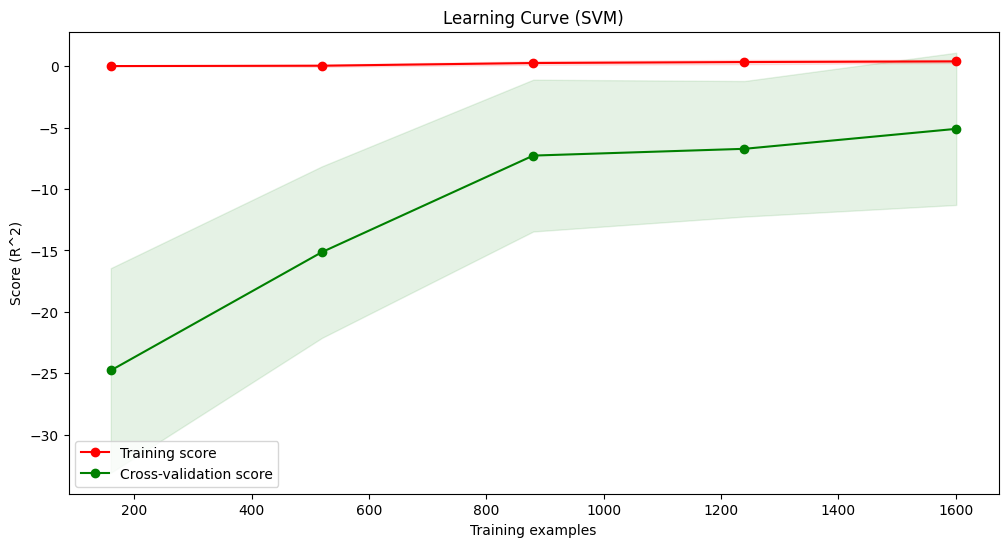

In [21]:
# Computing learning curves for the SVM model with the scoring method adjusted to r2
train_sizes_svm, train_scores_svm, validation_scores_svm = learning_curve(
    estimator=SVR(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for SVM
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
train_scores_std_svm = np.std(train_scores_svm, axis=1)
validation_scores_mean_svm = np.mean(validation_scores_svm, axis=1)
validation_scores_std_svm = np.std(validation_scores_svm, axis=1)

# Plotting the learning curves for SVM
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_svm, train_scores_mean_svm - train_scores_std_svm,
                 train_scores_mean_svm + train_scores_std_svm, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_svm, validation_scores_mean_svm - validation_scores_std_svm,
                 validation_scores_mean_svm + validation_scores_std_svm, alpha=0.1, color="g")
plt.plot(train_sizes_svm, train_scores_mean_svm, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_svm, validation_scores_mean_svm, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()


**Kết luận: Mô hình SVM cho thấy hiệu suất tốt cả trong huấn luyện và kiểm định chéo, với khả năng tổng quát hóa được cải thiện khi có thêm dữ liệu. Điều này báo hiệu rằng SVM có tiềm năng là một mô hình phù hợp cho bộ dữ liệu hiện tại**

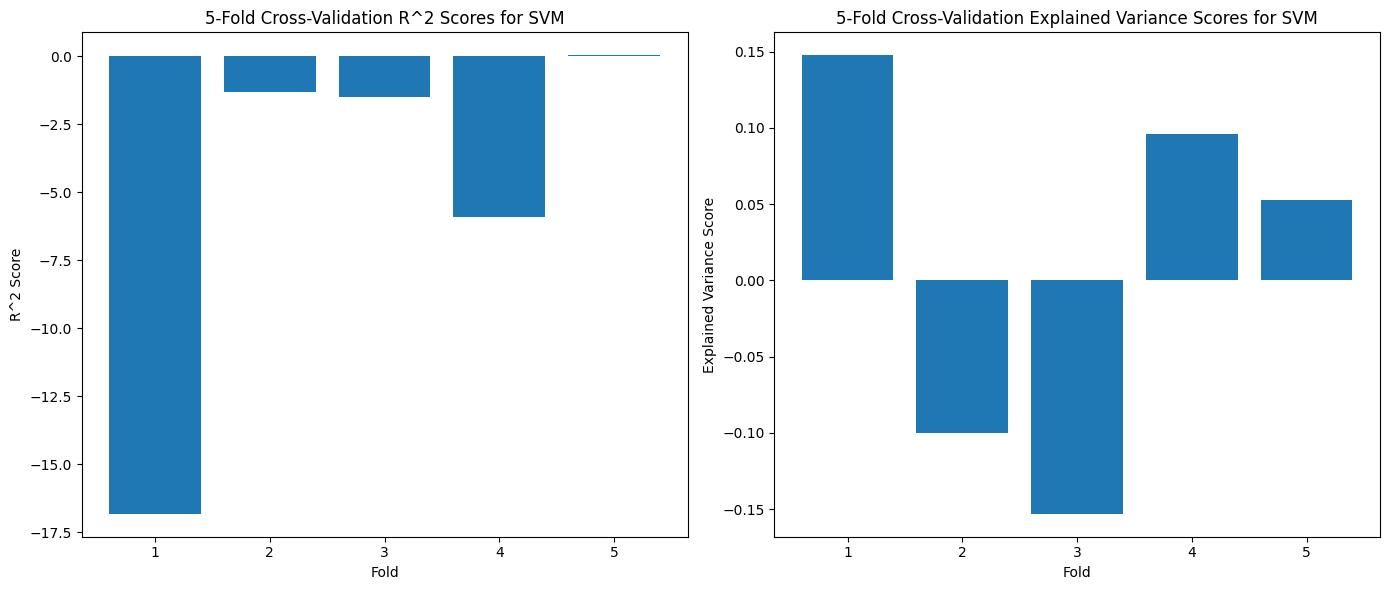

In [22]:
# Calculating cross-validation R^2 scores for the SVM model
cv_scores_r2_svm = cross_val_score(SVR(), X, y, cv=5, scoring='r2')

# Calculating explained variance scores for the SVM model
explained_variance_scores_svm = cross_val_score(SVR(), X, y, cv=5, scoring='explained_variance')

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for SVM
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_svm)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for SVM')

# Plotting the explained variance scores for SVM
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_svm)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for SVM')

plt.tight_layout()
plt.show()

**Kết luận: Mô hình SVM hiện tại cần được điều chỉnh và cải thiện để tăng khả năng giải thích dữ liệu**

## **6. KNN**

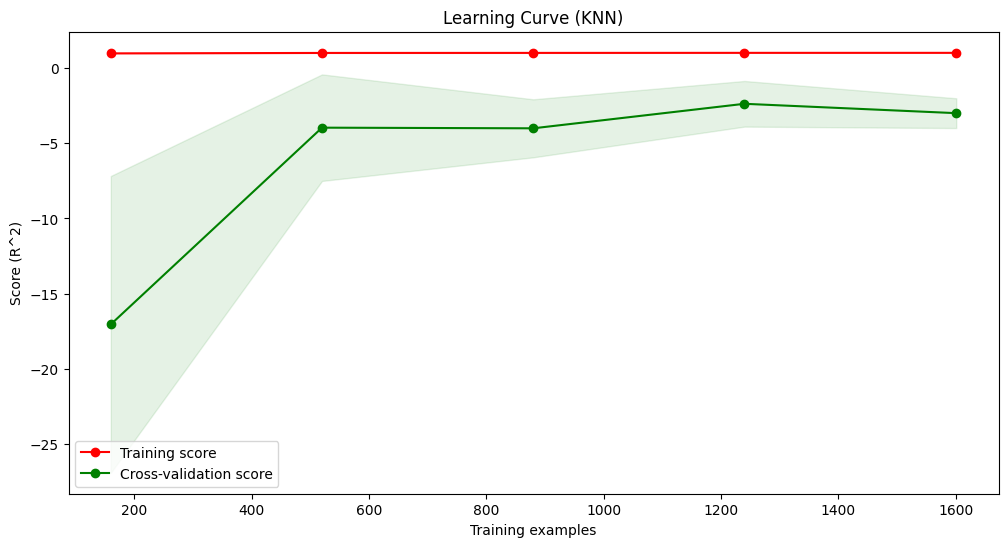

In [27]:
# Computing learning curves for the KNN model with the scoring method adjusted to r2
train_sizes_knn, train_scores_knn, validation_scores_knn = learning_curve(
    estimator=KNeighborsRegressor(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for KNN
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
validation_scores_mean_knn = np.mean(validation_scores_knn, axis=1)
validation_scores_std_knn = np.std(validation_scores_knn, axis=1)

# Plotting the learning curves for KNN
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_knn, validation_scores_mean_knn - validation_scores_std_knn,
                 validation_scores_mean_knn + validation_scores_std_knn, alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_knn, validation_scores_mean_knn, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (KNN)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()

**Kết luận: Mô hình KNN cho thấy khả năng tổng quát hóa tốt và điểm số không giảm xuống quá thấp khi thực hiện kiểm định chéo, điều này là dấu hiệu tốt.**

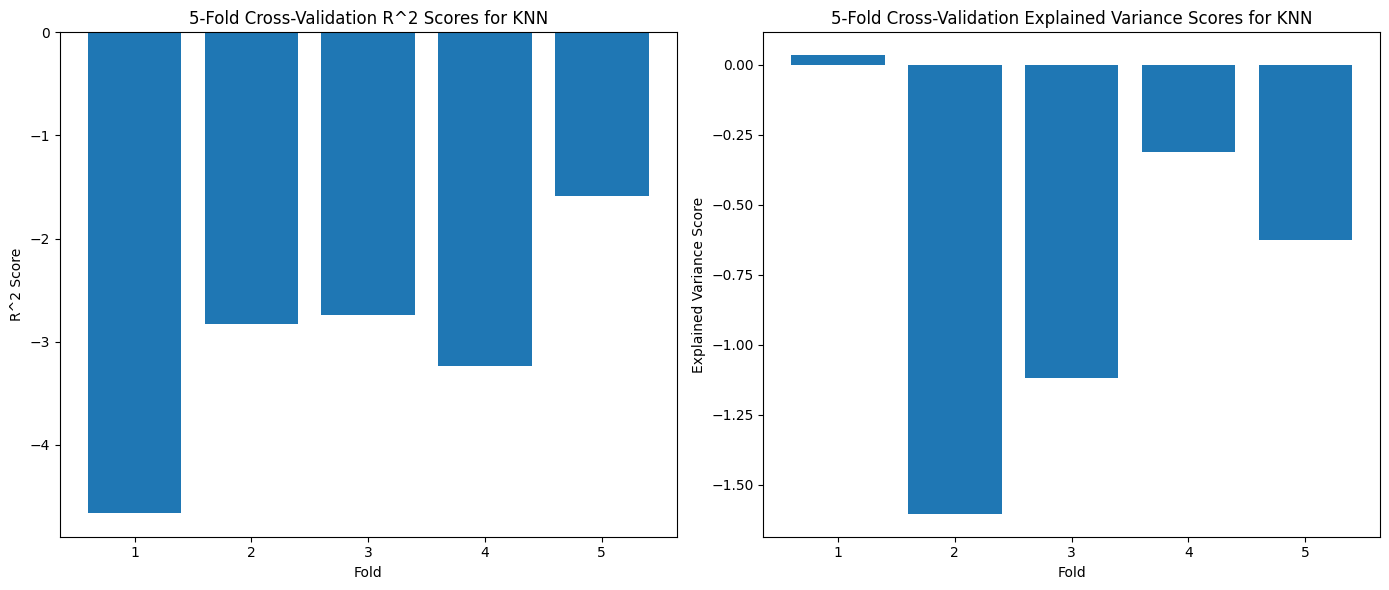

In [28]:
# Calculating cross-validation R^2 scores for the KNN model
cv_scores_r2_knn = cross_val_score(KNeighborsRegressor(), X, y, cv=5, scoring='r2')

# Calculating explained variance scores for the KNN model
explained_variance_scores_knn = cross_val_score(KNeighborsRegressor(), X, y, cv=5, scoring='explained_variance')

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for KNN
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_knn)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for KNN')

# Plotting the explained variance scores for KNN
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_knn)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for KNN')

plt.tight_layout()
plt.show()


Điểm số R^2: Các giá trị R^2 đều dưới không qua tất cả các fold, điều này cho thấy mô hình không thể giải thích được sự biến đổi của dữ liệu hiệu quả.

Explained Variance Scores: Các giá trị này biến động và phần lớn dưới không, cho thấy mô hình không nhất quán trong việc dự đoán dữ liệu

**Kết luận: Mô hình KNN không hiệu quả trong việc dự đoán dữ liệu này**


## **7. ANN**

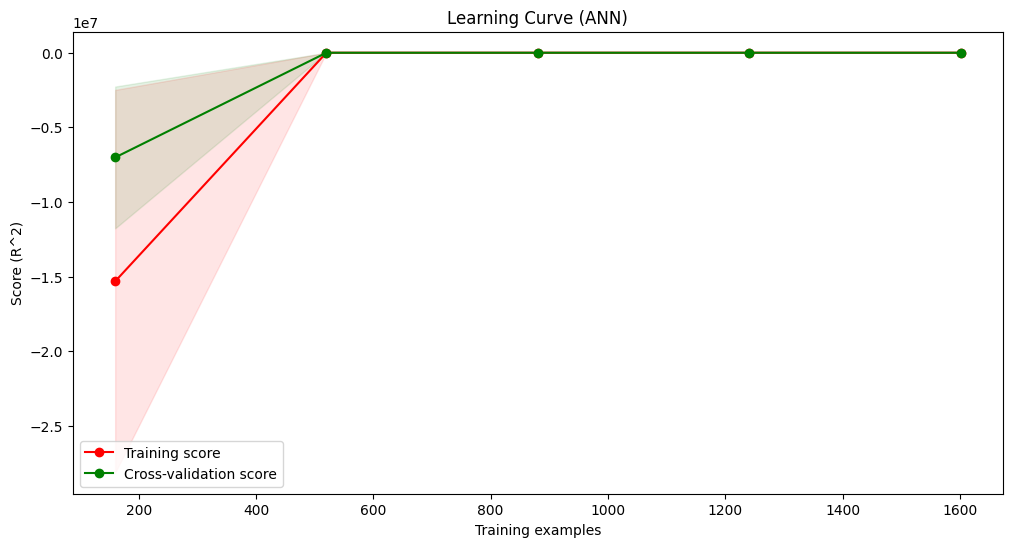

In [29]:
# Computing learning curves for the ANN model with the scoring method adjusted to r2
train_sizes_ann, train_scores_ann, validation_scores_ann = learning_curve(
    estimator=MLPRegressor(max_iter=1000),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='r2'
)

# Calculating the mean and standard deviation for training and validation scores for ANN
train_scores_mean_ann = np.mean(train_scores_ann, axis=1)
train_scores_std_ann = np.std(train_scores_ann, axis=1)
validation_scores_mean_ann = np.mean(validation_scores_ann, axis=1)
validation_scores_std_ann = np.std(validation_scores_ann, axis=1)

# Plotting the learning curves for ANN
plt.figure(figsize=(12, 6))

plt.fill_between(train_sizes_ann, train_scores_mean_ann - train_scores_std_ann,
                 train_scores_mean_ann + train_scores_std_ann, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_ann, validation_scores_mean_ann - validation_scores_std_ann,
                 validation_scores_mean_ann + validation_scores_std_ann, alpha=0.1, color="g")
plt.plot(train_sizes_ann, train_scores_mean_ann, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_ann, validation_scores_mean_ann, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve (ANN)")
plt.xlabel("Training examples")
plt.ylabel("Score (R^2)")
plt.legend(loc="best")

plt.show()


Điểm số huấn luyện (Training Score): Điểm số này bắt đầu thấp và nhanh chóng tăng lên, gần như đạt đến hoàn hảo (0 hoặc gần 0) khi tăng số lượng mẫu huấn luyện. Điều này cho thấy mô hình phù hợp rất tốt với dữ liệu huấn luyện.

Điểm số kiểm định chéo (Cross-validation Score): Tăng mạnh mẽ từ giá trị âm lớn, sau đó ổn định và có xu hướng tiệm cận với điểm số huấn luyện. Sự cải thiện lớn trong cross-validation score khi tăng số lượng mẫu cho thấy mô hình có khả năng tổng quát hóa từ dữ liệu huấn luyện đến dữ liệu kiểm định chéo.

**Kết luận: Mô hình ANN này có vẻ như hoạt động tốt với dữ liệu huấn luyện và cải thiện khả năng tổng quát hóa khi được cung cấp thêm mẫu.**

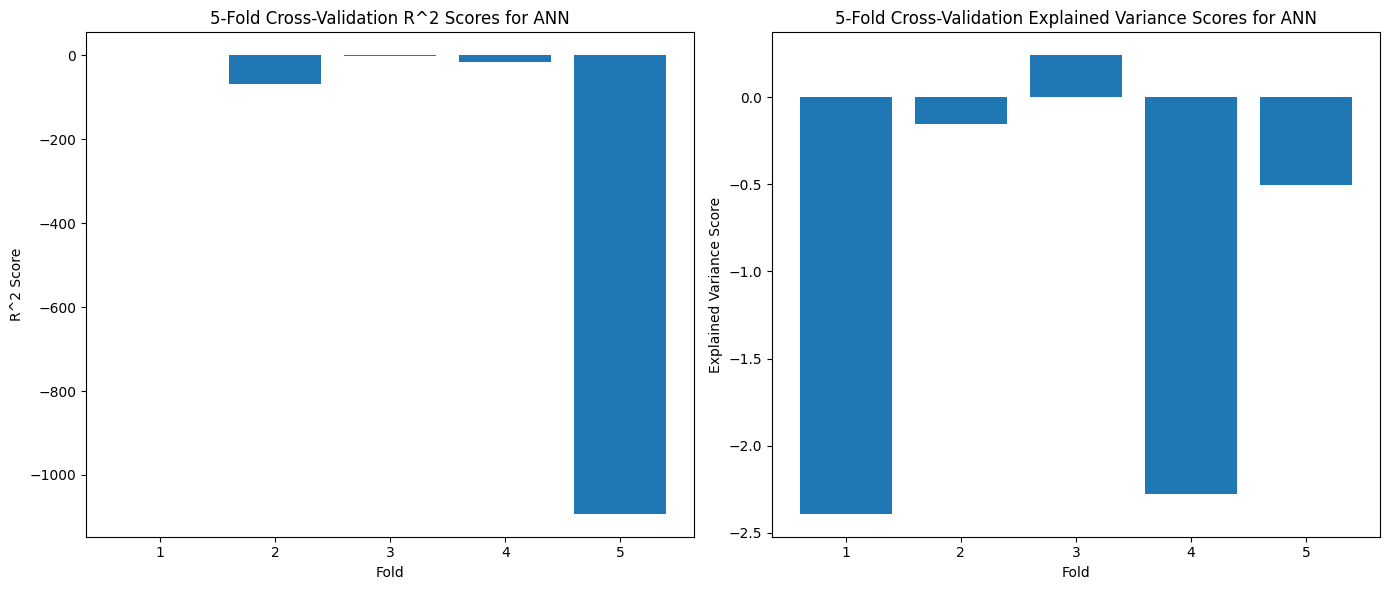

In [30]:
# Calculating cross-validation R^2 scores for the ANN model
cv_scores_r2_ann = cross_val_score(MLPRegressor(max_iter=1000), X, y, cv=5, scoring='r2', n_jobs=-1)

# Calculating explained variance scores for the ANN model
explained_variance_scores_ann = cross_val_score(MLPRegressor(max_iter=1000), X, y, cv=5, scoring='explained_variance', n_jobs=-1)

# Plotting the results for visualization
plt.figure(figsize=(14, 6))

# Plotting the cross-validation R^2 scores for ANN
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores_r2_ann)
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('5-Fold Cross-Validation R^2 Scores for ANN')

# Plotting the explained variance scores for ANN
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), explained_variance_scores_ann)
plt.xlabel('Fold')
plt.ylabel('Explained Variance Score')
plt.title('5-Fold Cross-Validation Explained Variance Scores for ANN')

plt.tight_layout()
plt.show()


R^2 Scores: Điểm số R^2 âm cực kỳ lớn qua các fold, gợi ý mô hình hoạt động rất kém, không thể giải thích được biến thiên của dữ liệu và thậm chí còn kém hơn nhiều so với việc sử dụng giá trị trung bình để dự đoán.

Explained Variance Scores: Cũng như R^2, giá trị Explained Variance âm cho thấy mô hình không thể dự đoán đúng mức độ biến thiên của dữ liệu. Có sự biến động lớn giữa các fold, nhưng tổng quan là tiêu cực.

**Kết luận: Các chỉ số đều cho thấy mô hình ANN hiện tại không phù hợp hoặc không được cấu hình đúng cách cho bộ dữ liệu này. Rất có thể mô hình bị overfitting, hoặc cấu trúc mạng nơ-ron không tối ưu.**

## **8. COMPARISION**

In [6]:
# Defining the models
models = {
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "ANN": MLPRegressor(max_iter=1000),
    "SVM": SVR()
}

# Training the models and making predictions
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    r2 = r2_score(y_test, predictions)

    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R-Squared": r2
    })

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results)

results_df

,Model,MSE,RMSE,MAE,MAPE,R-Squared
0,Random Forest,434.380983,20.841809,12.427751,1.211624,0.991462
1,XGBoost,495.908583,22.269005,14.214132,1.391971,0.990253
2,Linear Regression,7935.918942,89.083775,66.476096,6.860058,0.844021
3,Decision Tree,730.753939,27.032461,14.643067,1.438649,0.985637
4,KNN,447.630038,21.157269,13.684214,1.350528,0.991202
5,ANN,312067.743038,558.630238,490.278922,52.183034,-5.133621
6,SVM,31223.091322,176.700570,136.190948,14.281501,0.386317


Random Forest và KNN đạt điểm số R-Squared rất cao (> 0.99), cho thấy khả năng dự đoán rất tốt trên dữ liệu huấn luyện. Tuy nhiên, MSE và RMSE của Random Forest thấp hơn đôi chút so với KNN, điều này cho thấy Random Forest có độ chính xác cao hơn.

XGBoost cũng đạt R-Squared khá cao (0.9902) với các chỉ số MSE và RMSE có phần cao hơn so với Random Forest và KNN.
Decision Tree có hiệu suất tốt với R-Squared là 0.9856 nhưng không tốt bằng Random Forest, có thể do Random Forest là mô hình ensemble của nhiều cây quyết định.

Linear Regression có hiệu suất thấp nhất trong nhóm với R-Squared chỉ ở mức 0.8440, cùng với MSE và RMSE cao nhất.
ANN và SVM cho thấy hiệu suất không tốt, với R-Squared tiêu cực cho ANN, điều này cho thấy mô hình hoàn toàn không phù hợp với dữ liệu.

**Kết luận: Dựa vào các chỉ số đã được đưa ra, mô hình Random Forest xuất hiện là mô hình tốt nhất trong số này khi xét đến sự cân nhắc giữa độ chính xác và khả năng tổng quát hóa.**

# V. SHAP

## **1. RANDOM FOREST**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.3 MB/s eta 0:00:00


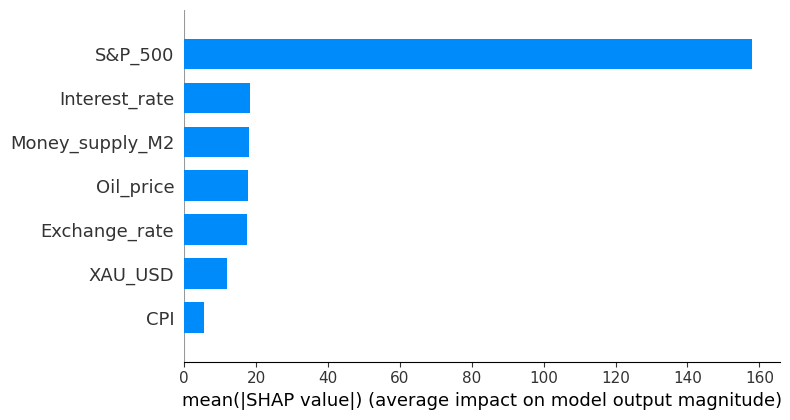

In [31]:
!pip install shap
import shap
from sklearn.ensemble import RandomForestRegressor

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Khởi tạo SHAP Explainer
explainer = shap.TreeExplainer(model)

# Tính toán SHAP values cho X_test
shap_values = explainer.shap_values(X_test)

# Trực quan hóa độ quan trọng của các đặc trưng
shap.summary_plot(shap_values, X_test, plot_type="bar")


S&P_500 có ảnh hưởng lớn nhất đến mô hình, cho thấy rằng biến này có vai trò quan trọng trong việc dự đoán output của mô hình. Sự biến động trong chỉ số S&P 500 có thể mạnh mẽ phản ánh sự thay đổi trong giá trị mà mô hình đang cố gắng dự đoán.

Interest_rate và Money_supply_M2 cũng có ảnh hưởng đáng kể, chỉ ra rằng lãi suất và lượng tiền cung ứng là những yếu tố quan trọng ảnh hưởng đến output mô hình.

Oil_price, Exchange_rate, và XAU_USD (giá vàng) có tác động vừa phải đến mô hình. Điều này có thể phản ánh tác động của những biến này đến nền kinh tế và thị trường tài chính, điều mà mô hình có thể đang cố gắng nắm bắt.

CPI có tác động nhỏ nhất, cho thấy rằng chỉ số giá tiêu dùng có thể không phải là một yếu tố chủ chốt trong việc dự đoán output của mô hình trong trường hợp cụ thể này.

## **2. XGBOOST**

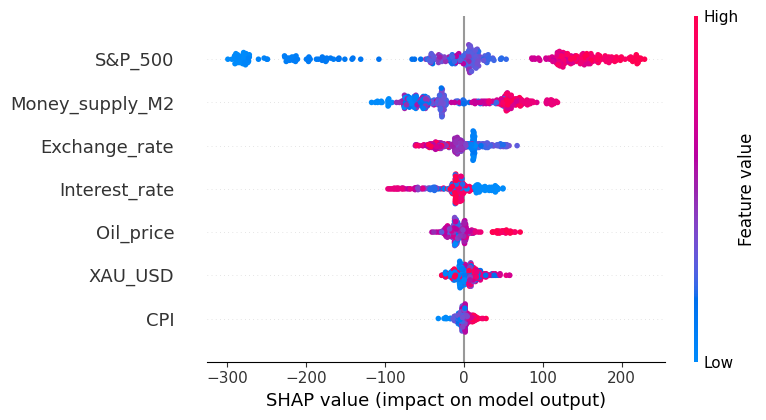

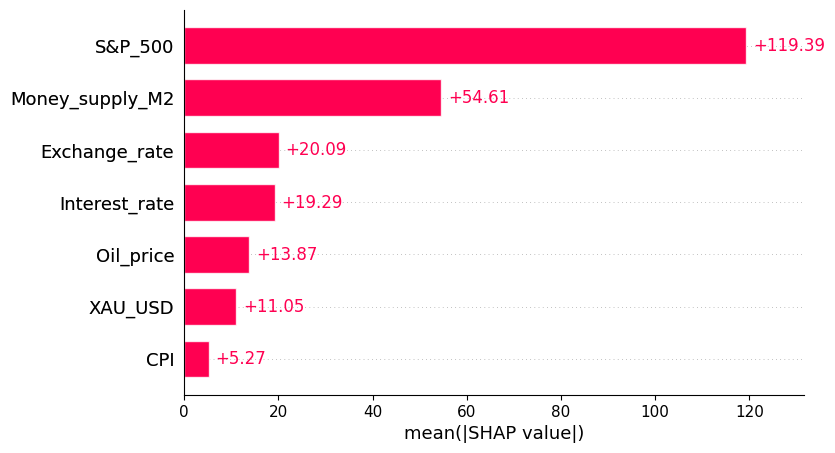

In [32]:
from xgboost import XGBRegressor

# Giả sử X_train, y_train là dữ liệu huấn luyện của bạn
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

import shap

# Khởi tạo SHAP Explainer
explainer = shap.Explainer(xgb_model)

# Tính toán SHAP values cho X_test
shap_values = explainer(X_test)

# Trực quan hóa tổng quan về độ quan trọng của các đặc trưng
shap.summary_plot(shap_values, X_test)

# Trực quan hóa độ quan trọng của các đặc trưng dưới dạng biểu đồ thanh
shap.plots.bar(shap_values)

S&P_500 có ảnh hưởng lớn nhất đối với dự đoán mô hình, với SHAP values phân bổ rộng trên cả phạm vi tác động tích cực và tiêu cực, nhưng chủ yếu là tích cực.

Money_supply_M2 cũng có ảnh hưởng đáng kể, với mức độ ảnh hưởng trung bình cao nhưng ít phân bổ rộng hơn so với S&P_500.

Exchange_rate, Interest_rate, Oil_price, và XAU_USD đều có các SHAP values nhỏ hơn, cho thấy chúng có tác động trung bình đến mô hình, nhưng vẫn có thể quan trọng đối với dự đoán cụ thể nào đó.

CPI có tác động nhỏ nhất theo biểu đồ thứ hai, nhưng beeswarm plot thể hiện một số outliers với tác động lớn, dù ít xuất hiện.

## **3. DECISION TREE REGRESSOR**

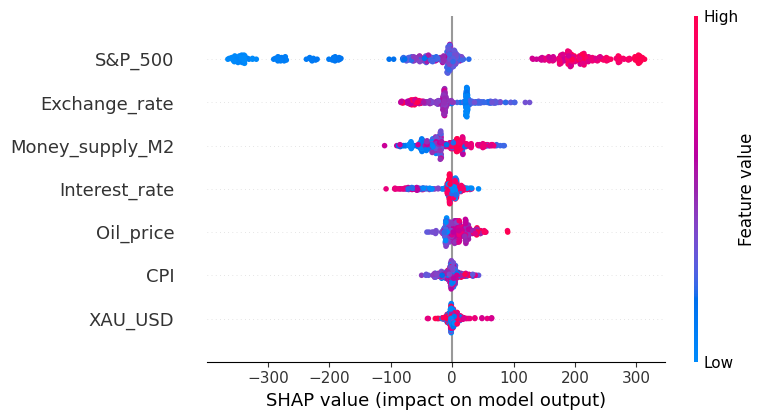

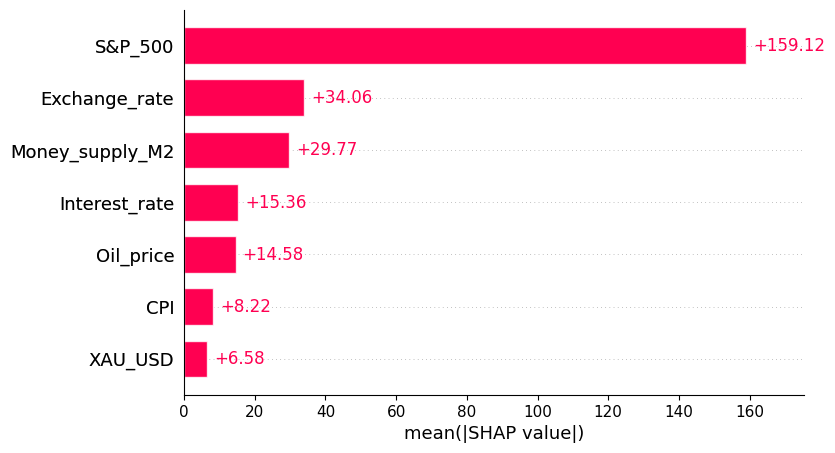

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Giả sử X_train, y_train là dữ liệu huấn luyện của bạn
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

import shap

# Khởi tạo SHAP Explainer
explainer = shap.Explainer(dt_model)

# Tính toán SHAP values cho X_test
shap_values = explainer(X_test)

# Trực quan hóa tổng quan về độ quan trọng của các đặc trưng
shap.summary_plot(shap_values, X_test)

# Trực quan hóa độ quan trọng của các đặc trưng dưới dạng biểu đồ thanh
shap.plots.bar(shap_values)

S&P 500 có ảnh hưởng lớn nhất đến mô hình, với SHAP values phân bố cả ở hướng tích cực và tiêu cực, điều này cho thấy sự biến động của chỉ số này có thể làm tăng hoặc giảm dự đoán mô hình.

Exchange_rate và Money_supply_M2 đều có ảnh hưởng đáng kể đến mô hình, với Exchange_rate dường như có sự biến động rộng hơn, điều này cho thấy sự không chắc chắn trong tác động của nó đến dự đoán.

Interest_rate, Oil_price, CPI, và XAU_USD đều có ảnh hưởng nhỏ hơn nhưng vẫn đáng kể. Cụ thể, Interest_rate và Oil_price có sự biến động lớn trong ảnh hưởng, trong khi CPI và XAU_USD có sự biến động nhỏ hơn.

Biểu đồ trung bình giá trị tuyệt đối SHAP cung cấp cái nhìn tổng quan về độ quan trọng của mỗi đặc trưng, cho thấy S&P 500 lại là đặc trưng quan trọng nhất, theo sau là Exchange_rate và Money_supply_M2. Những đặc trưng này có ảnh hưởng mạnh mẽ và nhất quán đến mô hình, trong khi Interest_rate, Oil_price, CPI, và XAU_USD có tác động ít hơn nhưng vẫn có thể quan trọng trong những trường hợp nhất định. Các điểm dữ liệu cụ thể trải dài qua một phạm vi rộng của SHAP values cho thấy rằng tác động cụ thể của mỗi đặc trưng có thể thay đổi đáng kể tùy theo các điều kiện cụ thể.

## **4. LINER REGRESSION**

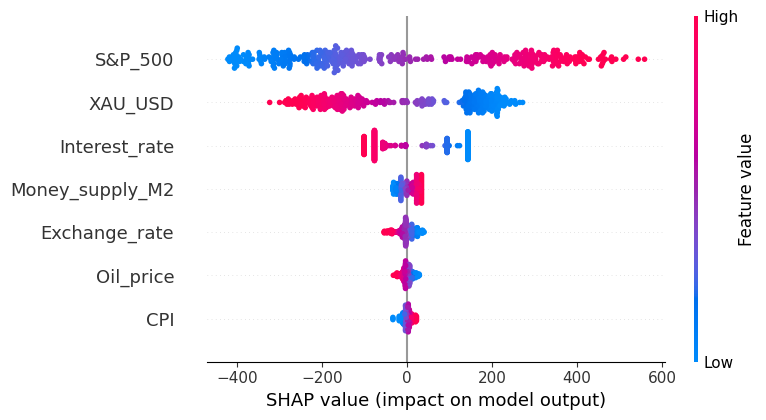

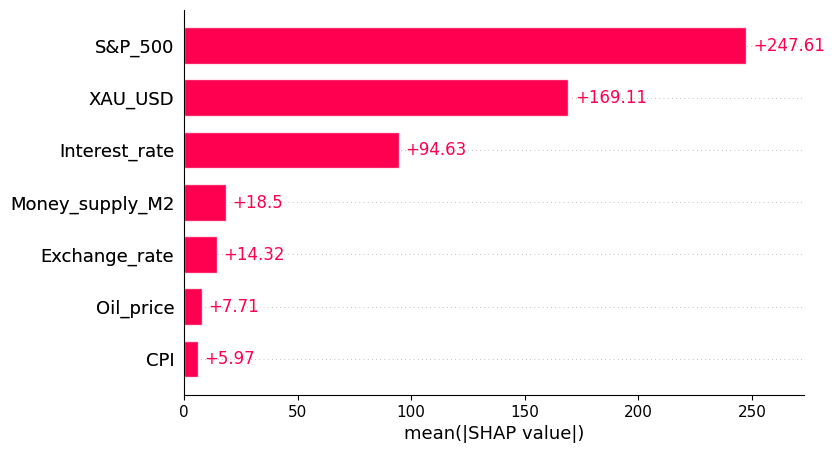

In [34]:
from sklearn.linear_model import LinearRegression

# Giả sử X_train, y_train là dữ liệu huấn luyện của bạn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

import shap

# Khởi tạo SHAP Explainer
explainer = shap.Explainer(lr_model, X_train)

# Tính toán SHAP values cho X_test
shap_values = explainer(X_test)

# Trực quan hóa tổng quan về độ quan trọng của các đặc trưng
shap.summary_plot(shap_values, X_test)

# Trực quan hóa độ quan trọng của các đặc trưng dưới dạng biểu đồ thanh
shap.plots.bar(shap_values)

S&P_500 có ảnh hưởng lớn và đa dạng đến kết quả dự đoán, với các SHAP values phân bố rộng từ âm đến dương.

XAU_USD và Interest_rate đều có ảnh hưởng quan trọng, nhưng phân bố SHAP values của Interest_rate cho thấy một số điểm dữ liệu có ảnh hưởng rất lớn (các điểm dữ liệu xa về phía bên trái và bên phải).

Các đặc trưng khác như Money_supply_M2, Exchange_rate, Oil_price, và CPI có ảnh hưởng ít hơn và ít biến động hơn so với S&P_500 và Interest_rate.

Biểu đồ SHAP value thứ hai, với các thanh biểu thị trung bình của giá trị tuyệt đối SHAP, cung cấp cái nhìn tổng quát về mức độ quan trọng tổng thể của mỗi đặc trưng đối với mô hình:

S&P_500 lại là đặc trưng có ảnh hưởng nhất, theo sau đó là XAU_USD và Interest_rate.

Các đặc trưng khác có ảnh hưởng ít quan trọng hơn đáng kể so với hai đặc trưng trên.

Những nhận xét này cho thấy trong mô hình hiện tại, diễn biến của thị trường chứng khoán (S&P 500) và giá vàng (XAU/USD) là những yếu tố chính ảnh hưởng đến dự đoán. Lãi suất cũng là một yếu tố ảnh hưởng lớn, có thể phản ánh tác động của chính sách tiền tệ đối với thị trường hoặc kinh tế. Điều này hợp lý trong bối cảnh của thị trường chứng khoán và có thể phản ánh sự phụ thuộc vào những biến số này trong việc đưa ra dự đoán.

## **5. ANN**

  0%|          | 0/100 [00:00<?, ?it/s]

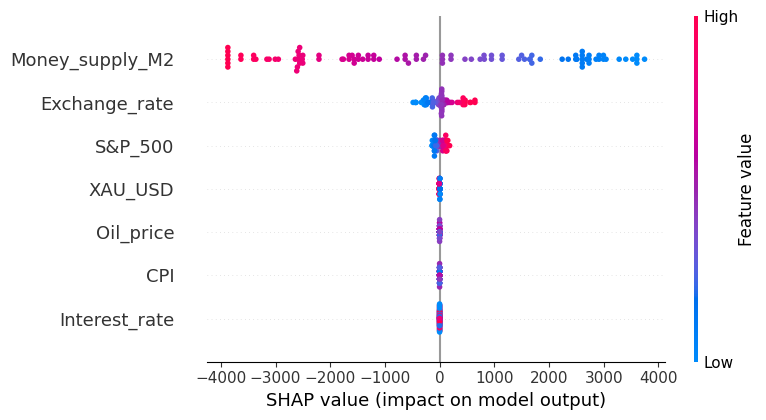

In [38]:
from sklearn.neural_network import MLPRegressor

# Huấn luyện mô hình ANN
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
ann_model.fit(X_train, y_train)

import shap

# Sử dụng KernelExplainer cho mô hình ANN
explainer = shap.KernelExplainer(ann_model.predict, shap.sample(X_train, 100)) # Sử dụng một mẫu từ X_train để giảm thời gian tính toán

# Tính toán SHAP values cho một mẫu của X_test
shap_values = explainer.shap_values(shap.sample(X_test, 100))

# Trực quan hóa độ quan trọng của các đặc trưng
shap.summary_plot(shap_values, shap.sample(X_test, 100))


Money_supply_M2 có những giá trị SHAP cao và thấp, cho thấy nó có ảnh hưởng lớn và đôi khi không đồng nhất đến dự đoán mô hình, có thể phản ánh tác động của chính sách tiền tệ hoặc điều kiện kinh tế rộng lớn.

Exchange_rate có vẻ có ảnh hưởng ít biến động hơn so với Money_supply_M2, nhưng vẫn có những SHAP values lớn cho thấy những thay đổi lớn trong tỷ giá hối đoái có thể ảnh hưởng đáng kể đến mô hình.

S&P_500 và XAU_USD cả hai đều có ảnh hưởng lớn đến mô hình, thể hiện qua các SHAP values xa trục không. Điều này phản ánh ảnh hưởng của thị trường chứng khoán và giá vàng đến dự đoán.

Oil_price, CPI, và Interest_rate có vẻ như có ít ảnh hưởng hơn, nhưng vẫn có những điểm SHAP values cụ thể nổi bật, cho thấy trong những hoàn cảnh nhất định, chúng có thể có tác động mạnh đến dự đoán.

## **6. KNN**

  0%|          | 0/10 [00:00<?, ?it/s]

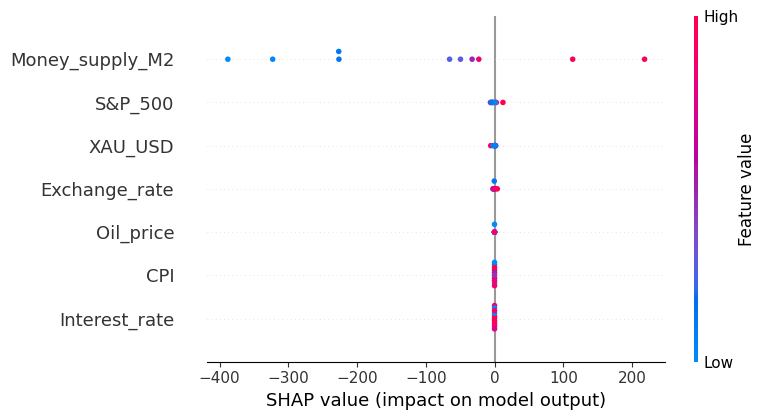

In [50]:
from sklearn.neighbors import KNeighborsRegressor

# Huấn luyện mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

import shap

# Khởi tạo KernelExplainer
explainer = shap.KernelExplainer(knn_model.predict, shap.sample(X_train, 100))  # Sử dụng một mẫu của X_train để giảm bớt chi phí tính toán

# Tính toán SHAP values cho một mẫu của X_test
shap_values = explainer.shap_values(shap.sample(X_test, 10))

# Trực quan hóa SHAP values cho các đặc trưng
shap.summary_plot(shap_values, shap.sample(X_test, 10))


Money_supply_M2 có ảnh hưởng lớn đến dự đoán mô hình, với các SHAP values phân bố từ âm đến dương, cho thấy rằng sự biến động trong lượng tiền cung ứng có thể dẫn đến cả sự tăng lẫn giảm trong giá trị được dự đoán.

S&P_500, XAU_USD, và Exchange_rate đều có ảnh hưởng quan trọng đến mô hình, nhưng không biến động mạnh như Money_supply_M2.

Oil_price và CPI có tác động nhỏ đến mô hình so với các biến khác, nhưng vẫn có những điểm dữ liệu với SHAP values cao, cho thấy trong những hoàn cảnh nhất định, chúng có thể ảnh hưởng đáng kể đến kết quả dự đoán.

Interest_rate thể hiện ảnh hưởng tiêu cực đến dự đoán mô hình với các giá trị SHAP chủ yếu là âm, cho thấy khi lãi suất tăng có thể dẫn đến sự giảm trong giá trị được dự đoán của mô hình.

## **7. SVM**

  0%|          | 0/401 [00:00<?, ?it/s]

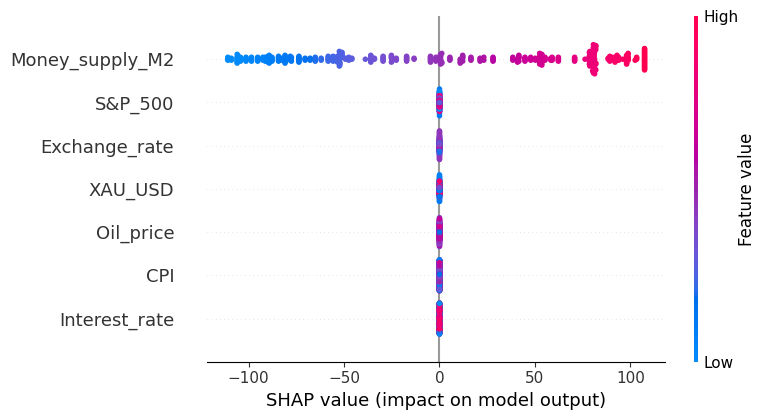

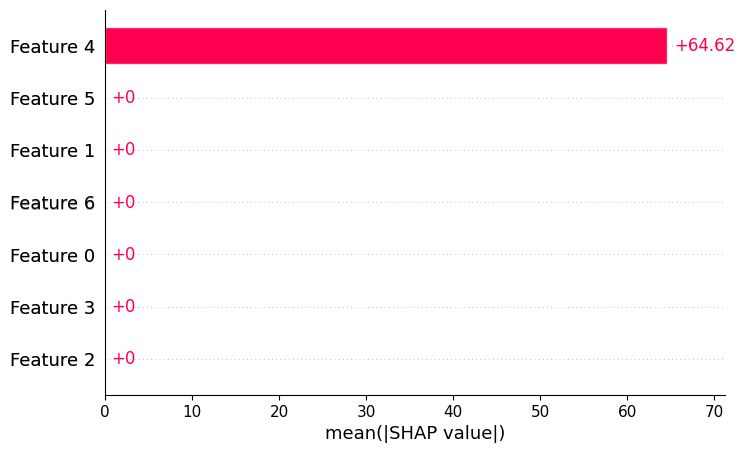

In [53]:
from sklearn.svm import SVR
import shap
import numpy as np

# Khởi tạo và huấn luyện mô hình SVM với dữ liệu huấn luyện (giả định X_train và y_train đã được định nghĩa)
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Tạo dữ liệu nền từ dữ liệu huấn luyện để giải thích mô hình SVM
background_data = shap.utils.sample(X_train, 100)  # Lấy mẫu 100 điểm dữ liệu

# Khởi tạo SHAP KernelExplainer với mô hình SVM
explainer = shap.KernelExplainer(svm_model.predict, background_data)

# Tính SHAP values cho X_test
shap_values = explainer.shap_values(X_test, nsamples=100)  # Sử dụng một số lượng mẫu hợp lý để ước lượng

# Đối với phiên bản SHAP mới hơn, có thể cần phải tạo một đối tượng Explanation
expected_value = np.array([explainer.expected_value]) if isinstance(explainer.expected_value, float) else explainer.expected_value
shap_explanation = shap.Explanation(values=shap_values, base_values=expected_value, data=X_test)

# Trực quan hóa tổng quan về độ quan trọng của các đặc trưng
shap.summary_plot(shap_explanation, X_test)

# Trực quan hóa độ quan trọng của các đặc trưng dưới dạng biểu đồ thanh
shap.plots.bar(shap_explanation)

Money_supply_M2, S&P_500, Exchange_rate, XAU_USD (giá vàng), Oil_price (giá dầu), CPI (Chỉ số giá tiêu dùng), và Interest_rate (lãi suất) là các đặc trưng được đánh giá.
Màu sắc của các điểm thể hiện giá trị của đặc trưng, với màu đỏ tương ứng với giá trị cao và màu xanh tương ứng với giá trị thấp.

Đối với mô hình SVM của bạn, Money_supply_M2 có vẻ như là đặc trưng có ảnh hưởng mạnh mẽ nhất đến dự đoán, theo sau là S&P_500 và Exchange_rate. Một số đặc trưng có ảnh hưởng tích cực (SHAP value dương) và một số có ảnh hưởng tiêu cực (SHAP value âm) đến dự đoán của mô hình.